# EV Battery Health Prediction - Data Preparation and Exploratory Data Analysis (EDA)

This notebook performs initial data exploration and preparation for EV battery health prediction, focusing on State of Health (SOH) and Remaining Useful Life (RUL) analysis.

## Objectives
- Load and examine all available battery datasets
- Understand data structure, types, and distributions
- Identify missing values and data quality issues
- Prepare data for feature engineering and modeling


## 1. Import Required Libraries

We'll use the following libraries for data manipulation, analysis, and visualization:


In [14]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

# Configuration
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 10

print("✓ All libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


Defaulting to user installation because normal site-packages is not writeable
✓ All libraries imported successfully!
Pandas version: 2.2.3
NumPy version: 2.0.2



[notice] A new release of pip is available: 25.0.1 -> 25.3
[notice] To update, run: C:\Users\HP\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


## 2. Load Datasets

We have the following datasets available:
1. **Battery_RUL.csv** - Battery Remaining Useful Life dataset with cycle-based features
2. **Experimental_data_fresh_cell.csv** - Time-series data from fresh battery cell experiments
3. **Experimental_data_aged_cell.csv** - Time-series data from aged battery cell experiments
4. **OCV_vs_SOC_curve.csv** - Open Circuit Voltage vs State of Charge relationship data


In [15]:
# Load all datasets
print("Loading datasets...")
print("=" * 60)

# 1. Battery RUL Dataset
rul_df = pd.read_csv('Battery_RUL.csv')
print(f"✓ Battery_RUL.csv loaded - Shape: {rul_df.shape}")

# 2. Fresh Cell Experimental Data
fresh_cell_df = pd.read_csv('Experimental_data_fresh_cell.csv')
print(f"✓ Experimental_data_fresh_cell.csv loaded - Shape: {fresh_cell_df.shape}")

# 3. Aged Cell Experimental Data
aged_cell_df = pd.read_csv('Experimental_data_aged_cell.csv')
print(f"✓ Experimental_data_aged_cell.csv loaded - Shape: {aged_cell_df.shape}")

# 4. OCV vs SOC Curve Data
ocv_soc_df = pd.read_csv('OCV_vs_SOC_curve.csv')
print(f"✓ OCV_vs_SOC_curve.csv loaded - Shape: {ocv_soc_df.shape}")

print("=" * 60)
print("All datasets loaded successfully!")


Loading datasets...
✓ Battery_RUL.csv loaded - Shape: (15064, 9)
✓ Experimental_data_fresh_cell.csv loaded - Shape: (358309, 4)
✓ Experimental_data_aged_cell.csv loaded - Shape: (307513, 4)
✓ OCV_vs_SOC_curve.csv loaded - Shape: (1001, 2)
All datasets loaded successfully!


## 3. Dataset 1: Battery RUL (Remaining Useful Life)

This dataset contains cycle-based features and the target variable RUL, which indicates how many cycles remain before the battery reaches end-of-life.


In [16]:
# Display first few rows
print("First 10 rows of Battery RUL dataset:")
print("=" * 80)
display(rul_df.head(10))


First 10 rows of Battery RUL dataset:


,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001000,6755.01,10777.82,1112
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992000,6762.02,10500.35,1111
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993000,6762.02,10420.38,1110
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016000,6762.02,10322.81,1109
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992000,53213.54,56699.65,1107
5,7.0,3301.18,1194.235077,3.674,3.504,5023.633636,5977.38,5977.38,1106
6,8.0,5955.30,1220.135329,4.013,3.501,5017.495000,5967.55,5967.55,1105
7,9.0,5951.20,1220.135329,4.014,3.501,5017.496000,5962.21,5962.21,1104
8,10.0,5945.44,1216.920914,4.014,3.501,5009.993667,5954.91,5954.91,1103
9,11.0,435251.49,263086.078000,4.267,3.086,269.984000,443700.02,443700.02,1102


In [17]:
# Data types information
print("Data Types:")
print("=" * 80)
print(rul_df.dtypes)
print(f"\nTotal columns: {len(rul_df.columns)}")
print(f"Total rows: {len(rul_df)}")


Data Types:
Cycle_Index                  float64
Discharge Time (s)           float64
Decrement 3.6-3.4V (s)       float64
Max. Voltage Dischar. (V)    float64
Min. Voltage Charg. (V)      float64
Time at 4.15V (s)            float64
Time constant current (s)    float64
Charging time (s)            float64
RUL                            int64
dtype: object

Total columns: 9
Total rows: 15064


In [18]:
# Summary statistics
print("Summary Statistics:")
print("=" * 80)
display(rul_df.describe())


Summary Statistics:


,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,556.155005,4581.273960,1239.784672,3.908176,3.577904,3768.336171,5461.266970,10066.496204,554.194172
std,322.378480,33144.012077,15039.589269,0.091003,0.123695,9129.552477,25155.845202,26415.354121,322.434514
min,1.000000,8.690000,-397645.908000,3.043000,3.022000,-113.584000,5.980000,5.980000,0.000000
25%,271.000000,1169.310000,319.600000,3.846000,3.488000,1828.884179,2564.310000,7841.922500,277.000000
50%,560.000000,1557.250000,439.239471,3.906000,3.574000,2930.203500,3824.260000,8320.415000,551.000000
75%,833.000000,1908.000000,600.000000,3.972000,3.663000,4088.326500,5012.350000,8763.282500,839.000000
max,1134.000000,958320.370000,406703.768000,4.363000,4.379000,245101.117000,880728.100000,880728.100000,1133.000000


In [19]:
# Missing values check
print("Missing Values:")
print("=" * 80)
missing_values = rul_df.isnull().sum()
missing_percent = (missing_values / len(rul_df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0]
if len(missing_df) > 0:
    display(missing_df)
else:
    print("✓ No missing values found!")
    
# Column names
print(f"\nColumn Names: {list(rul_df.columns)}")


Missing Values:
✓ No missing values found!

Column Names: ['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)', 'RUL']


## 4. Dataset 2: Fresh Cell Experimental Data

This dataset contains time-series measurements from experiments on a fresh (new) battery cell, including current, voltage, and temperature readings over time.


In [20]:
# Display first few rows
print("First 10 rows of Fresh Cell Experimental Data:")
print("=" * 80)
display(fresh_cell_df.head(10))


First 10 rows of Fresh Cell Experimental Data:


,Time,Current,Voltage,Temperature
0,0.000000,2.158704,2.999607,26.384377
1,1.000000,2.287674,2.999407,26.227879
2,2.000000,2.228280,2.999757,26.449251
3,2.999992,2.224886,2.999857,26.277494
4,4.000000,2.134946,2.999958,26.380539
5,5.000000,2.148522,2.999407,26.254581
6,6.000000,2.146825,2.999557,26.262211
7,7.000000,2.078946,2.999407,26.418709
8,8.000000,2.067067,2.999407,26.380539
9,9.000000,2.078946,2.999557,26.143908


In [21]:
# Data types information
print("Data Types:")
print("=" * 80)
print(fresh_cell_df.dtypes)
print(f"\nTotal columns: {len(fresh_cell_df.columns)}")
print(f"Total rows: {len(fresh_cell_df)}")
print(f"Time range: {fresh_cell_df['Time'].min():.2f} to {fresh_cell_df['Time'].max():.2f} seconds")


Data Types:
Time           float64
Current        float64
Voltage        float64
Temperature    float64
dtype: object

Total columns: 4
Total rows: 358309
Time range: 0.00 to 358308.00 seconds


In [22]:
# Summary statistics
print("Summary Statistics:")
print("=" * 80)
display(fresh_cell_df.describe())


Summary Statistics:


,Time,Current,Voltage,Temperature
count,358309.000000,358309.000000,358309.000000,358309.000000
mean,179154.000000,-0.142882,3.816629,25.715882
std,103435.043139,17.736151,0.203309,0.327616
min,0.000000,-20.105541,2.998705,24.776148
25%,89577.000000,-19.951117,3.704146,25.491190
50%,179153.999992,-4.340691,3.820156,25.727844
75%,268730.999992,20.037979,3.956430,25.964499
max,358308.000000,32.476771,4.204252,27.113413


In [23]:
# Missing values check
print("Missing Values:")
print("=" * 80)
missing_values = fresh_cell_df.isnull().sum()
missing_percent = (missing_values / len(fresh_cell_df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0]
if len(missing_df) > 0:
    display(missing_df)
else:
    print("✓ No missing values found!")
    
# Column names
print(f"\nColumn Names: {list(fresh_cell_df.columns)}")


Missing Values:
✓ No missing values found!

Column Names: ['Time', 'Current', 'Voltage', 'Temperature']


## 5. Dataset 3: Aged Cell Experimental Data

This dataset contains time-series measurements from experiments on an aged (degraded) battery cell, showing how battery performance changes after usage.


In [24]:
# Display first few rows
print("First 10 rows of Aged Cell Experimental Data:")
print("=" * 80)
display(aged_cell_df.head(10))


First 10 rows of Aged Cell Experimental Data:


,Time,Current,Voltage,Temperature
0,0.000000,2.360728,2.999311,27.449894
1,1.000008,2.303036,2.999813,27.724861
2,2.000008,2.284371,2.999863,27.545357
3,3.000008,2.221588,2.999863,27.457523
4,4.000008,2.158805,2.999813,27.484249
5,5.000008,2.096023,2.999311,27.671408
6,6.000008,2.040028,2.999562,27.610302
7,7.000008,2.028150,2.999913,27.499533
8,8.000015,-20.049273,3.108820,27.526283
9,9.000000,-20.017035,3.119144,27.476620


In [25]:
# Data types information
print("Data Types:")
print("=" * 80)
print(aged_cell_df.dtypes)
print(f"\nTotal columns: {len(aged_cell_df.columns)}")
print(f"Total rows: {len(aged_cell_df)}")
print(f"Time range: {aged_cell_df['Time'].min():.2f} to {aged_cell_df['Time'].max():.2f} seconds")


Data Types:
Time           float64
Current        float64
Voltage        float64
Temperature    float64
dtype: object

Total columns: 4
Total rows: 307513
Time range: 0.00 to 307512.00 seconds


In [26]:
# Summary statistics
print("Summary Statistics:")
print("=" * 80)
display(aged_cell_df.describe())


Summary Statistics:


,Time,Current,Voltage,Temperature
count,307513.000000,307513.000000,307513.000000,307513.000000
mean,153756.000008,-0.163968,3.849060,26.320183
std,88771.501002,17.285349,0.206192,0.433726
min,0.000000,-20.152779,2.998059,25.112604
25%,76878.000008,-19.996674,3.726224,25.941347
50%,153756.000008,-4.350225,3.858586,26.372910
75%,230634.000008,19.973799,3.996411,26.640247
max,307512.000008,33.203965,4.208818,28.110600


In [27]:
# Missing values check
print("Missing Values:")
print("=" * 80)
missing_values = aged_cell_df.isnull().sum()
missing_percent = (missing_values / len(aged_cell_df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0]
if len(missing_df) > 0:
    display(missing_df)
else:
    print("✓ No missing values found!")
    
# Column names
print(f"\nColumn Names: {list(aged_cell_df.columns)}")


Missing Values:
✓ No missing values found!

Column Names: ['Time', 'Current', 'Voltage', 'Temperature']


## 6. Dataset 4: OCV vs SOC Curve

This dataset contains the relationship between Open Circuit Voltage (OCV) and State of Charge (SOC), which is essential for battery state estimation and health monitoring.


In [28]:
# Display first few rows
print("First 10 rows of OCV vs SOC Curve data:")
print("=" * 80)
display(ocv_soc_df.head(10))


First 10 rows of OCV vs SOC Curve data:


,SOC,V0
0,0.000,3.010470
1,0.001,3.031911
2,0.002,3.049571
3,0.003,3.065900
4,0.004,3.080937
5,0.005,3.095162
6,0.006,3.108475
7,0.007,3.121056
8,0.008,3.132974
9,0.009,3.144238


In [29]:
# Data types information
print("Data Types:")
print("=" * 80)
print(ocv_soc_df.dtypes)
print(f"\nTotal columns: {len(ocv_soc_df.columns)}")
print(f"Total rows: {len(ocv_soc_df)}")
print(f"SOC range: {ocv_soc_df['SOC'].min():.4f} to {ocv_soc_df['SOC'].max():.4f}")
print(f"V0 (OCV) range: {ocv_soc_df['V0'].min():.4f} to {ocv_soc_df['V0'].max():.4f} V")


Data Types:
SOC    float64
V0     float64
dtype: object

Total columns: 2
Total rows: 1001
SOC range: 0.0000 to 1.0000
V0 (OCV) range: 3.0105 to 4.1977 V


In [30]:
# Summary statistics
print("Summary Statistics:")
print("=" * 80)
display(ocv_soc_df.describe())


Summary Statistics:


,SOC,V0
count,1001.000000,1001.000000
mean,0.500000,3.776021
std,0.289108,0.236200
min,0.000000,3.010470
25%,0.250000,3.604114
50%,0.500000,3.777094
75%,0.750000,3.979707
max,1.000000,4.197726


In [31]:
# Missing values check
print("Missing Values:")
print("=" * 80)
missing_values = ocv_soc_df.isnull().sum()
missing_percent = (missing_values / len(ocv_soc_df)) * 100
missing_df = pd.DataFrame({
    'Missing Count': missing_values,
    'Percentage': missing_percent
})
missing_df = missing_df[missing_df['Missing Count'] > 0]
if len(missing_df) > 0:
    display(missing_df)
else:
    print("✓ No missing values found!")
    
# Column names
print(f"\nColumn Names: {list(ocv_soc_df.columns)}")


Missing Values:
✓ No missing values found!

Column Names: ['SOC', 'V0']


## 7. Data Merging

This section identifies common keys between datasets and merges them appropriately for comprehensive battery health analysis. We'll merge the cycle-based RUL dataset with time-series experimental data to create a unified dataset for modeling.


### 7.1 Check for Common Columns

First, let's examine all datasets to identify potential merge keys such as `cycle_number`, `Cycle_Index`, `time_stamp`, `Time`, or other common identifiers.


In [32]:
# Check for common columns across all datasets
print("Checking for common columns across datasets...")
print("=" * 80)

# Collect all column names from each dataset
all_columns = {
    'RUL Dataset': set(rul_df.columns),
    'Fresh Cell': set(fresh_cell_df.columns),
    'Aged Cell': set(aged_cell_df.columns),
    'OCV vs SOC': set(ocv_soc_df.columns)
}

# Find potential merge keys
potential_keys = ['cycle_number', 'Cycle_Index', 'cycle_index', 'Cycle', 'cycle',
                  'time_stamp', 'Time', 'time', 'timestamp', 'Timestamp',
                  'index', 'Index', 'id', 'ID', 'Id']

print("\n1. Column names in each dataset:")
for dataset_name, columns in all_columns.items():
    print(f"\n{dataset_name}:")
    print(f"   {sorted(columns)}")

# Check for exact common columns
common_cols_rul_fresh = all_columns['RUL Dataset'] & all_columns['Fresh Cell']
common_cols_rul_aged = all_columns['RUL Dataset'] & all_columns['Aged Cell']
common_cols_fresh_aged = all_columns['Fresh Cell'] & all_columns['Aged Cell']

print("\n2. Common columns between datasets:")
print(f"\n   RUL ↔ Fresh Cell: {sorted(common_cols_rul_fresh) if common_cols_rul_fresh else 'None'}")
print(f"   RUL ↔ Aged Cell: {sorted(common_cols_rul_aged) if common_cols_rul_aged else 'None'}")
print(f"   Fresh ↔ Aged Cell: {sorted(common_cols_fresh_aged) if common_cols_fresh_aged else 'None'}")

# Check for potential merge keys (case-insensitive)
print("\n3. Potential merge keys found:")
found_keys = {}
for key_pattern in potential_keys:
    for dataset_name, columns in all_columns.items():
        matching_cols = [col for col in columns if key_pattern.lower() in col.lower()]
        if matching_cols:
            if dataset_name not in found_keys:
                found_keys[dataset_name] = []
            found_keys[dataset_name].extend(matching_cols)

for dataset_name, keys in found_keys.items():
    print(f"   {dataset_name}: {keys}")


Checking for common columns across datasets...

1. Column names in each dataset:

RUL Dataset:
   ['Charging time (s)', 'Cycle_Index', 'Decrement 3.6-3.4V (s)', 'Discharge Time (s)', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'RUL', 'Time at 4.15V (s)', 'Time constant current (s)']

Fresh Cell:
   ['Current', 'Temperature', 'Time', 'Voltage']

Aged Cell:
   ['Current', 'Temperature', 'Time', 'Voltage']

OCV vs SOC:
   ['SOC', 'V0']

2. Common columns between datasets:

   RUL ↔ Fresh Cell: None
   RUL ↔ Aged Cell: None
   Fresh ↔ Aged Cell: ['Current', 'Temperature', 'Time', 'Voltage']

3. Potential merge keys found:
   RUL Dataset: ['Cycle_Index', 'Cycle_Index', 'Cycle_Index', 'Cycle_Index', 'Time constant current (s)', 'Discharge Time (s)', 'Time at 4.15V (s)', 'Charging time (s)', 'Time constant current (s)', 'Discharge Time (s)', 'Time at 4.15V (s)', 'Charging time (s)', 'Cycle_Index', 'Cycle_Index']
   Fresh Cell: ['Time', 'Time']
   Aged Cell: ['Time', 'Time']


### 7.2 Merge Datasets

Based on the common columns identified, we'll attempt to merge the datasets. The strategy:
- **Primary merge**: RUL dataset (cycle-based) with experimental data (time-series)
- **Merge type**: Will use inner join if exact keys match, or outer join to preserve all data
- **If no exact match**: Align by index with explanation of the approach


In [33]:
import os

# Prepare for merging
print("=" * 80)
print("DATASET MERGING PROCESS")
print("=" * 80)

# Strategy: Since RUL is cycle-based and experimental data is time-series,
# we'll merge them in a way that preserves both perspectives

# Step 1: Check if we can merge RUL with experimental data on a common key
merge_attempted = False
merged_df = None
merge_method = None
merge_key = None

# Try to find cycle-related column in RUL
rul_cycle_cols = [col for col in rul_df.columns if 'cycle' in col.lower() or 'index' in col.lower()]
print(f"\nStep 1: Identifying merge keys...")
print(f"   RUL dataset cycle columns: {rul_cycle_cols}")

# Since experimental data has Time but not cycle number, we need to align differently
# Option 1: If RUL has Cycle_Index and we can map experimental data to cycles
if 'Cycle_Index' in rul_df.columns:
    print(f"   ✓ Found 'Cycle_Index' in RUL dataset")
    
    # For experimental data, we'll create a synthetic cycle mapping or merge by position
    # Since experimental data is time-series and RUL is cycle-based, 
    # we'll use an outer join approach
    print(f"\nStep 2: Merging datasets...")
    print(f"   Note: RUL data is cycle-based, experimental data is time-series")
    print(f"   Strategy: Combining both datasets to preserve all features")
    
    # Combine fresh and aged cell data first
    fresh_cell_labeled = fresh_cell_df.copy()
    fresh_cell_labeled['Cell_Type'] = 'Fresh'
    
    aged_cell_labeled = aged_cell_df.copy()
    aged_cell_labeled['Cell_Type'] = 'Aged'
    
    # Combine experimental data
    experimental_combined = pd.concat([fresh_cell_labeled, aged_cell_labeled], 
                                       ignore_index=True)
    print(f"   ✓ Combined experimental data: {experimental_combined.shape}")
    
    # Since RUL is cycle-based (one row per cycle) and experimental data is time-series
    # (multiple rows per time point), we'll merge them to create a comprehensive dataset
    # We'll keep RUL as the primary structure and add experimental data features
    
    # Add row numbers to align by index if needed
    rul_df_aligned = rul_df.copy().reset_index(drop=True)
    experimental_combined_aligned = experimental_combined.copy().reset_index(drop=True)
    
    # Create a merged dataset that combines both perspectives
    # Since they don't share a direct key, we'll align by index with explanation
    if len(rul_df_aligned) <= len(experimental_combined_aligned):
        # If RUL is smaller, use it as base and sample/aggregate experimental data
        print(f"\n   Merging approach: RUL dataset ({len(rul_df_aligned)} rows) is smaller")
        print(f"   than combined experimental data ({len(experimental_combined_aligned)} rows)")
        print(f"   Strategy: Using RUL as primary structure, adding experimental data statistics")
        
        # For demonstration, we'll create a merged dataset by aligning by index
        # In practice, you might want to aggregate experimental data by cycle
        merged_df = rul_df_aligned.copy()
        
        # Add experimental data statistics as new columns (sample for demonstration)
        # In real scenario, you'd aggregate experimental data per cycle
        if len(experimental_combined_aligned) >= len(rul_df_aligned):
            # Sample experimental data to match RUL length
            sample_size = len(rul_df_aligned)
            experimental_sample = experimental_combined_aligned.head(sample_size).reset_index(drop=True)
            
            # Add experimental features with suffix to avoid conflicts
            for col in experimental_sample.columns:
                if col not in merged_df.columns:
                    merged_df[f'Exp_{col}'] = experimental_sample[col].values
                else:
                    merged_df[f'Exp_{col}'] = experimental_sample[col].values
        
        merge_method = "Index alignment (RUL as base, experimental data sampled)"
        merge_key = "Index (no direct key match found)"
        
    else:
        # If experimental data is smaller, use it as base
        print(f"\n   Merging approach: Using experimental data as base")
        merged_df = experimental_combined_aligned.copy()
        
        # Sample RUL data to match experimental length
        sample_size = min(len(merged_df), len(rul_df_aligned))
        rul_sample = rul_df_aligned.head(sample_size).reset_index(drop=True)
        
        for col in rul_sample.columns:
            if col not in merged_df.columns:
                merged_df[f'RUL_{col}'] = rul_sample[col].values
            else:
                merged_df[f'RUL_{col}'] = rul_sample[col].values
        
        merge_method = "Index alignment (Experimental as base, RUL sampled)"
        merge_key = "Index (no direct key match found)"
    
    merge_attempted = True
    
else:
    # Alternative: If no Cycle_Index, try other approaches
    print(f"\n   Alternative merge strategy: Direct index alignment")
    merged_df = rul_df.copy()
    merge_method = "Index alignment (no cycle column found)"
    merge_key = "Index"

print(f"\n✓ Merge completed!")
print(f"   Method: {merge_method}")
print(f"   Key used: {merge_key}")
print(f"   Merged dataset shape: {merged_df.shape}")
print(f"   Original RUL shape: {rul_df.shape}")
print(f"   Original Experimental combined shape: {experimental_combined.shape if 'experimental_combined' in locals() else 'N/A'}")


DATASET MERGING PROCESS

Step 1: Identifying merge keys...
   RUL dataset cycle columns: ['Cycle_Index']
   ✓ Found 'Cycle_Index' in RUL dataset

Step 2: Merging datasets...
   Note: RUL data is cycle-based, experimental data is time-series
   Strategy: Combining both datasets to preserve all features
   ✓ Combined experimental data: (665822, 5)

   Merging approach: RUL dataset (15064 rows) is smaller
   than combined experimental data (665822 rows)
   Strategy: Using RUL as primary structure, adding experimental data statistics

✓ Merge completed!
   Method: Index alignment (RUL as base, experimental data sampled)
   Key used: Index (no direct key match found)
   Merged dataset shape: (15064, 14)
   Original RUL shape: (15064, 9)
   Original Experimental combined shape: (665822, 5)


### 7.3 Merge Explanation and Validation

Let's examine the merged dataset and explain the merging strategy, especially if no exact match was found.


In [34]:
# Display merged dataset information
print("Merged Dataset Overview:")
print("=" * 80)
print(f"\nShape: {merged_df.shape}")
print(f"Columns ({len(merged_df.columns)}): {list(merged_df.columns)}")
print(f"\nFirst few rows:")
display(merged_df.head(10))

# Explanation of merge approach
print("\n" + "=" * 80)
print("MERGE STRATEGY EXPLANATION:")
print("=" * 80)

if merge_key == "Index (no direct key match found)":
    print("""
    ⚠ NO EXACT KEY MATCH FOUND - Index Alignment Used
    
    Reasoning:
    - RUL dataset is cycle-based (one row per battery cycle)
    - Experimental data is time-series (multiple rows per time point)
    - These datasets represent different temporal granularities
    
    Merge Approach:
    1. RUL dataset contains cycle-level aggregated features (discharge time, voltage, etc.)
    2. Experimental data contains high-frequency measurements (current, voltage, temperature)
    3. Since no direct 1:1 mapping exists, we aligned datasets by index/position
    4. This creates a combined dataset with both cycle-level and time-series features
    
    Note: In production, you might want to:
    - Aggregate time-series data per cycle before merging
    - Create cycle identifiers in experimental data
    - Use time-based features to infer cycle membership
    """)
else:
    print(f"""
    ✓ Merged using: {merge_key}
    Method: {merge_method}
    """)

# Check for missing values in merged dataset
print("\n" + "=" * 80)
print("MERGED DATASET QUALITY CHECK:")
print("=" * 80)
missing_merged = merged_df.isnull().sum()
missing_percent_merged = (missing_merged / len(merged_df)) * 100
missing_df_merged = pd.DataFrame({
    'Missing Count': missing_merged,
    'Percentage': missing_percent_merged
})
missing_df_merged = missing_df_merged[missing_df_merged['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df_merged) > 0:
    print(f"\n⚠ Missing values found:")
    display(missing_df_merged.head(20))
else:
    print("\n✓ No missing values in merged dataset!")
    
print(f"\nData types:")
print(merged_df.dtypes.value_counts())


Merged Dataset Overview:

Shape: (15064, 14)
Columns (14): ['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)', 'RUL', 'Exp_Time', 'Exp_Current', 'Exp_Voltage', 'Exp_Temperature', 'Exp_Cell_Type']

First few rows:


,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL,Exp_Time,Exp_Current,Exp_Voltage,Exp_Temperature,Exp_Cell_Type
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001000,6755.01,10777.82,1112,0.000000,2.158704,2.999607,26.384377,Fresh
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992000,6762.02,10500.35,1111,1.000000,2.287674,2.999407,26.227879,Fresh
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993000,6762.02,10420.38,1110,2.000000,2.228280,2.999757,26.449251,Fresh
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016000,6762.02,10322.81,1109,2.999992,2.224886,2.999857,26.277494,Fresh
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992000,53213.54,56699.65,1107,4.000000,2.134946,2.999958,26.380539,Fresh
5,7.0,3301.18,1194.235077,3.674,3.504,5023.633636,5977.38,5977.38,1106,5.000000,2.148522,2.999407,26.254581,Fresh
6,8.0,5955.30,1220.135329,4.013,3.501,5017.495000,5967.55,5967.55,1105,6.000000,2.146825,2.999557,26.262211,Fresh
7,9.0,5951.20,1220.135329,4.014,3.501,5017.496000,5962.21,5962.21,1104,7.000000,2.078946,2.999407,26.418709,Fresh
8,10.0,5945.44,1216.920914,4.014,3.501,5009.993667,5954.91,5954.91,1103,8.000000,2.067067,2.999407,26.380539,Fresh
9,11.0,435251.49,263086.078000,4.267,3.086,269.984000,443700.02,443700.02,1102,9.000000,2.078946,2.999557,26.143908,Fresh



MERGE STRATEGY EXPLANATION:

    ⚠ NO EXACT KEY MATCH FOUND - Index Alignment Used
    
    Reasoning:
    - RUL dataset is cycle-based (one row per battery cycle)
    - Experimental data is time-series (multiple rows per time point)
    - These datasets represent different temporal granularities
    
    Merge Approach:
    1. RUL dataset contains cycle-level aggregated features (discharge time, voltage, etc.)
    2. Experimental data contains high-frequency measurements (current, voltage, temperature)
    3. Since no direct 1:1 mapping exists, we aligned datasets by index/position
    4. This creates a combined dataset with both cycle-level and time-series features
    
    Note: In production, you might want to:
    - Aggregate time-series data per cycle before merging
    - Create cycle identifiers in experimental data
    - Use time-based features to infer cycle membership
    

MERGED DATASET QUALITY CHECK:

✓ No missing values in merged dataset!

Data types:
float64    12
int64

### 7.4 Save Merged Data

Save the merged dataset to the `/data` folder for use in subsequent analysis and modeling.


In [35]:
# Create data directory if it doesn't exist
data_dir = 'data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"✓ Created directory: {data_dir}/")
else:
    print(f"✓ Directory exists: {data_dir}/")

# Save merged dataset
output_path = os.path.join(data_dir, 'merged_battery_data.csv')
merged_df.to_csv(output_path, index=False)

print("\n" + "=" * 80)
print("SAVE CONFIRMATION:")
print("=" * 80)
print(f"✓ Merged dataset saved successfully!")
print(f"  File path: {output_path}")
print(f"  File size: {os.path.getsize(output_path) / (1024*1024):.2f} MB")
print(f"  Rows: {len(merged_df):,}")
print(f"  Columns: {len(merged_df.columns)}")

# Verify the saved file
if os.path.exists(output_path):
    verify_df = pd.read_csv(output_path)
    print(f"\n✓ Verification: File loaded successfully - Shape: {verify_df.shape}")
    print(f"✓ First 5 rows of saved file:")
    display(verify_df.head(5))
else:
    print(f"\n⚠ Warning: Could not verify saved file!")


✓ Created directory: data/

SAVE CONFIRMATION:
✓ Merged dataset saved successfully!
  File path: data\merged_battery_data.csv
  File size: 1.76 MB
  Rows: 15,064
  Columns: 14

✓ Verification: File loaded successfully - Shape: (15064, 14)
✓ First 5 rows of saved file:


,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL,Exp_Time,Exp_Current,Exp_Voltage,Exp_Temperature,Exp_Cell_Type
0,1.0,2595.30,1151.488500,3.670,3.211,5460.001,6755.01,10777.82,1112,0.000000,2.158704,2.999607,26.384377,Fresh
1,2.0,7408.64,1172.512500,4.246,3.220,5508.992,6762.02,10500.35,1111,1.000000,2.287674,2.999407,26.227879,Fresh
2,3.0,7393.76,1112.992000,4.249,3.224,5508.993,6762.02,10420.38,1110,2.000000,2.228280,2.999757,26.449251,Fresh
3,4.0,7385.50,1080.320667,4.250,3.225,5502.016,6762.02,10322.81,1109,2.999992,2.224886,2.999857,26.277494,Fresh
4,6.0,65022.75,29813.487000,4.290,3.398,5480.992,53213.54,56699.65,1107,4.000000,2.134946,2.999958,26.380539,Fresh


## 8. Data Cleaning

This section performs comprehensive data cleaning on the merged dataset to ensure data quality for modeling. We'll check for missing values, remove duplicates, and impute missing data appropriately.


### 8.1 Check Missing Values

First, let's identify all missing values in the merged dataset using `df.isnull().sum()` to get a complete picture of data quality issues.


In [36]:
# Check for missing values using df.isnull().sum()
print("=" * 80)
print("MISSING VALUES ANALYSIS - BEFORE CLEANING")
print("=" * 80)

# Get missing value counts for all columns
missing_before = merged_df.isnull().sum()
missing_percent_before = (missing_before / len(merged_df)) * 100

# Create summary DataFrame
missing_summary_before = pd.DataFrame({
    'Column': missing_before.index,
    'Missing Count': missing_before.values,
    'Missing Percentage': missing_percent_before.values
})

# Sort by missing count (descending)
missing_summary_before = missing_summary_before.sort_values('Missing Count', ascending=False)

# Filter to show only columns with missing values
missing_summary_before_filtered = missing_summary_before[missing_summary_before['Missing Count'] > 0]

print(f"\nTotal rows in dataset: {len(merged_df):,}")
print(f"Total columns in dataset: {len(merged_df.columns)}")
print(f"\nColumns with missing values: {len(missing_summary_before_filtered)} out of {len(merged_df.columns)}")

if len(missing_summary_before_filtered) > 0:
    print(f"\nMissing Values Summary (Before Cleaning):")
    print("-" * 80)
    display(missing_summary_before_filtered)
    
    print(f"\nTotal missing values across all columns: {missing_before.sum():,}")
    print(f"Total missing values percentage: {(missing_before.sum() / (len(merged_df) * len(merged_df.columns))) * 100:.2f}%")
else:
    print("\n✓ No missing values found in the dataset!")

# Store for later comparison
total_missing_before = missing_before.sum()


MISSING VALUES ANALYSIS - BEFORE CLEANING

Total rows in dataset: 15,064
Total columns in dataset: 14

Columns with missing values: 0 out of 14

✓ No missing values found in the dataset!


### 8.2 Remove Duplicate Rows

Check for and remove any duplicate rows in the dataset to ensure data integrity.


In [37]:
# Check for duplicate rows
print("=" * 80)
print("DUPLICATE ROWS ANALYSIS")
print("=" * 80)

initial_rows = len(merged_df)
duplicate_count = merged_df.duplicated().sum()

print(f"\nInitial number of rows: {initial_rows:,}")
print(f"Number of duplicate rows: {duplicate_count:,}")

if duplicate_count > 0:
    duplicate_percent = (duplicate_count / initial_rows) * 100
    print(f"Percentage of duplicate rows: {duplicate_percent:.2f}%")
    
    # Remove duplicates
    merged_df_cleaned = merged_df.drop_duplicates()
    rows_removed = initial_rows - len(merged_df_cleaned)
    
    print(f"\n✓ Removed {rows_removed:,} duplicate row(s)")
    print(f"✓ Remaining rows after duplicate removal: {len(merged_df_cleaned):,}")
    
    # Update merged_df to cleaned version
    merged_df = merged_df_cleaned.copy()
else:
    print("\n✓ No duplicate rows found. Dataset is clean!")
    
print(f"\nFinal dataset shape after duplicate removal: {merged_df.shape}")


DUPLICATE ROWS ANALYSIS

Initial number of rows: 15,064
Number of duplicate rows: 0

✓ No duplicate rows found. Dataset is clean!

Final dataset shape after duplicate removal: (15064, 14)


### 8.3 Handle Missing Values

Fill missing values using appropriate strategies:
- **Numeric columns**: Fill with median (more robust to outliers than mean)
- **Categorical columns**: Fill with mode (most frequent value)
- Track and report how many values were filled


In [38]:
# Separate numeric and categorical columns
print("=" * 80)
print("MISSING VALUE IMPUTATION")
print("=" * 80)

# Identify column types
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = merged_df.select_dtypes(include=['object']).columns.tolist()

print(f"\nColumn Type Distribution:")
print(f"  Numeric columns: {len(numeric_cols)}")
print(f"  Categorical columns: {len(categorical_cols)}")

# Track imputation statistics
imputation_summary = {
    'Column': [],
    'Type': [],
    'Missing Count': [],
    'Imputation Method': [],
    'Imputed Value': []
}

# Create a copy for cleaning
merged_df_cleaned = merged_df.copy()

# Fill numeric columns with median
print(f"\n" + "-" * 80)
print("Imputing Numeric Columns (using median):")
print("-" * 80)

numeric_imputed_count = 0
for col in numeric_cols:
    missing_count = merged_df_cleaned[col].isnull().sum()
    if missing_count > 0:
        median_value = merged_df_cleaned[col].median()
        merged_df_cleaned[col].fillna(median_value, inplace=True)
        
        imputation_summary['Column'].append(col)
        imputation_summary['Type'].append('Numeric')
        imputation_summary['Missing Count'].append(missing_count)
        imputation_summary['Imputation Method'].append('Median')
        imputation_summary['Imputed Value'].append(f"{median_value:.4f}")
        
        numeric_imputed_count += missing_count
        print(f"  ✓ {col}: Filled {missing_count:,} values with median = {median_value:.4f}")

if numeric_imputed_count == 0:
    print("  ✓ No missing values in numeric columns")

# Fill categorical columns with mode
print(f"\n" + "-" * 80)
print("Imputing Categorical Columns (using mode):")
print("-" * 80)

categorical_imputed_count = 0
for col in categorical_cols:
    missing_count = merged_df_cleaned[col].isnull().sum()
    if missing_count > 0:
        mode_value = merged_df_cleaned[col].mode()
        if len(mode_value) > 0:
            mode_value = mode_value[0]
            merged_df_cleaned[col].fillna(mode_value, inplace=True)
            
            imputation_summary['Column'].append(col)
            imputation_summary['Type'].append('Categorical')
            imputation_summary['Missing Count'].append(missing_count)
            imputation_summary['Imputation Method'].append('Mode')
            imputation_summary['Imputed Value'].append(str(mode_value))
            
            categorical_imputed_count += missing_count
            print(f"  ✓ {col}: Filled {missing_count:,} values with mode = '{mode_value}'")
        else:
            # If no mode exists (all values are NaN), fill with 'Unknown'
            merged_df_cleaned[col].fillna('Unknown', inplace=True)
            imputation_summary['Column'].append(col)
            imputation_summary['Type'].append('Categorical')
            imputation_summary['Missing Count'].append(missing_count)
            imputation_summary['Imputation Method'].append('Mode (Unknown)')
            imputation_summary['Imputed Value'].append('Unknown')
            
            categorical_imputed_count += missing_count
            print(f"  ✓ {col}: Filled {missing_count:,} values with 'Unknown' (no mode available)")

if categorical_imputed_count == 0:
    print("  ✓ No missing values in categorical columns")

# Update merged_df
merged_df = merged_df_cleaned.copy()

# Print summary
print(f"\n" + "=" * 80)
print("IMPUTATION SUMMARY")
print("=" * 80)
print(f"Total numeric values imputed: {numeric_imputed_count:,}")
print(f"Total categorical values imputed: {categorical_imputed_count:,}")
print(f"Total values imputed: {numeric_imputed_count + categorical_imputed_count:,}")

if len(imputation_summary['Column']) > 0:
    imputation_df = pd.DataFrame(imputation_summary)
    print(f"\nDetailed Imputation Report:")
    display(imputation_df)
else:
    print("\n✓ No imputation was needed - no missing values found!")


MISSING VALUE IMPUTATION

Column Type Distribution:
  Numeric columns: 13
  Categorical columns: 1

--------------------------------------------------------------------------------
Imputing Numeric Columns (using median):
--------------------------------------------------------------------------------
  ✓ No missing values in numeric columns

--------------------------------------------------------------------------------
Imputing Categorical Columns (using mode):
--------------------------------------------------------------------------------
  ✓ No missing values in categorical columns

IMPUTATION SUMMARY
Total numeric values imputed: 0
Total categorical values imputed: 0
Total values imputed: 0

✓ No imputation was needed - no missing values found!


### 8.4 Before/After Comparison

Create visualization to compare missing data counts before and after cleaning.


In [39]:
# Check missing values after cleaning
print("=" * 80)
print("MISSING VALUES ANALYSIS - AFTER CLEANING")
print("=" * 80)

missing_after = merged_df.isnull().sum()
total_missing_after = missing_after.sum()

print(f"\nTotal missing values after cleaning: {total_missing_after:,}")

if total_missing_after == 0:
    print("✓ All missing values have been successfully imputed!")
else:
    print(f"⚠ Warning: {total_missing_after:,} missing values remain after cleaning")

# Create before/after comparison visualization
print("\n" + "=" * 80)
print("CREATING BEFORE/AFTER COMPARISON PLOTS")
print("=" * 80)

# Prepare data for plotting
comparison_data = pd.DataFrame({
    'Column': missing_before.index,
    'Before Cleaning': missing_before.values,
    'After Cleaning': missing_after.values
})

# Filter to show only columns that had missing values or still have them
comparison_data = comparison_data[
    (comparison_data['Before Cleaning'] > 0) | 
    (comparison_data['After Cleaning'] > 0)
].sort_values('Before Cleaning', ascending=False)

if len(comparison_data) > 0:
    # Plot 1: Bar chart comparing missing values
    fig, axes = plt.subplots(1, 2, figsize=(16, 8))
    
    # Limit to top 20 columns for readability
    plot_data = comparison_data.head(20)
    
    # Left plot: Missing values count comparison
    x_pos = np.arange(len(plot_data))
    width = 0.35
    
    axes[0].bar(x_pos - width/2, plot_data['Before Cleaning'], width, 
                label='Before Cleaning', color='#e74c3c', alpha=0.7)
    axes[0].bar(x_pos + width/2, plot_data['After Cleaning'], width,
                label='After Cleaning', color='#2ecc71', alpha=0.7)
    
    axes[0].set_xlabel('Columns', fontsize=12, fontweight='bold')
    axes[0].set_ylabel('Missing Value Count', fontsize=12, fontweight='bold')
    axes[0].set_title('Missing Values: Before vs After Cleaning (Top 20 Columns)', 
                     fontsize=14, fontweight='bold', pad=20)
    axes[0].set_xticks(x_pos)
    axes[0].set_xticklabels(plot_data['Column'], rotation=45, ha='right', fontsize=9)
    axes[0].legend(fontsize=11)
    axes[0].grid(axis='y', alpha=0.3)
    
    # Right plot: Total missing values summary
    summary_data = {
        'Category': ['Total Missing\n(Before)', 'Total Missing\n(After)', 'Values Imputed'],
        'Count': [total_missing_before, total_missing_after, total_missing_before - total_missing_after]
    }
    summary_df = pd.DataFrame(summary_data)
    
    colors = ['#e74c3c', '#2ecc71', '#3498db']
    bars = axes[1].bar(summary_df['Category'], summary_df['Count'], color=colors, alpha=0.7)
    
    # Add value labels on bars
    for bar, count in zip(bars, summary_df['Count']):
        height = bar.get_height()
        axes[1].text(bar.get_x() + bar.get_width()/2., height,
                    f'{int(count):,}',
                    ha='center', va='bottom', fontsize=11, fontweight='bold')
    
    axes[1].set_ylabel('Count', fontsize=12, fontweight='bold')
    axes[1].set_title('Overall Missing Values Summary', fontsize=14, fontweight='bold', pad=20)
    axes[1].grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.savefig('data_cleaning_comparison.png', dpi=300, bbox_inches='tight')
    print("✓ Comparison plot saved as 'data_cleaning_comparison.png'")
    plt.show()
    
    # Print summary statistics
    print(f"\n" + "=" * 80)
    print("CLEANING SUMMARY STATISTICS")
    print("=" * 80)
    print(f"Missing values before cleaning: {total_missing_before:,}")
    print(f"Missing values after cleaning: {total_missing_after:,}")
    print(f"Values imputed: {total_missing_before - total_missing_after:,}")
    if total_missing_before > 0:
        imputation_rate = ((total_missing_before - total_missing_after) / total_missing_before) * 100
        print(f"Imputation success rate: {imputation_rate:.2f}%")
    
    # Display comparison table
    print(f"\nBefore/After Comparison (Columns with missing values):")
    display(comparison_data.head(30))
    
else:
    print("\n✓ No missing values were present, so no comparison plot needed!")

# Final dataset info
print(f"\n" + "=" * 80)
print("FINAL CLEANED DATASET INFO")
print("=" * 80)
print(f"Shape: {merged_df.shape}")
print(f"Total cells: {merged_df.size:,}")
print(f"Missing values: {merged_df.isnull().sum().sum():,}")
print(f"Duplicate rows: {merged_df.duplicated().sum():,}")
print(f"\n✓ Data cleaning completed successfully!")


MISSING VALUES ANALYSIS - AFTER CLEANING

Total missing values after cleaning: 0
✓ All missing values have been successfully imputed!

CREATING BEFORE/AFTER COMPARISON PLOTS

✓ No missing values were present, so no comparison plot needed!

FINAL CLEANED DATASET INFO
Shape: (15064, 14)
Total cells: 210,896
Missing values: 0
Duplicate rows: 0

✓ Data cleaning completed successfully!


### 8.5 Save Cleaned Data

Update the merged dataset file with the cleaned version.


In [40]:
# Update the saved merged dataset with cleaned version
output_path = os.path.join('data', 'merged_battery_data.csv')
merged_df.to_csv(output_path, index=False)

print("=" * 80)
print("UPDATED DATASET SAVE CONFIRMATION")
print("=" * 80)
print(f"✓ Cleaned dataset saved successfully!")
print(f"  File path: {output_path}")
print(f"  File size: {os.path.getsize(output_path) / (1024*1024):.2f} MB")
print(f"  Rows: {len(merged_df):,}")
print(f"  Columns: {len(merged_df.columns)}")
print(f"  Missing values: {merged_df.isnull().sum().sum():,}")
print(f"  Duplicate rows: {merged_df.duplicated().sum():,}")

# Verify the saved file
if os.path.exists(output_path):
    verify_df = pd.read_csv(output_path)
    print(f"\n✓ Verification: Cleaned file loaded successfully - Shape: {verify_df.shape}")
    print(f"✓ Missing values in saved file: {verify_df.isnull().sum().sum():,}")
else:
    print(f"\n⚠ Warning: Could not verify saved file!")


UPDATED DATASET SAVE CONFIRMATION
✓ Cleaned dataset saved successfully!
  File path: data\merged_battery_data.csv
  File size: 1.76 MB
  Rows: 15,064
  Columns: 14
  Missing values: 0
  Duplicate rows: 0

✓ Verification: Cleaned file loaded successfully - Shape: (15064, 14)
✓ Missing values in saved file: 0


## 9. Exploratory Data Analysis (EDA)

This section performs comprehensive exploratory data analysis to understand the distribution, relationships, and patterns in the cleaned dataset. We'll visualize key features and identify potential insights for modeling.


### 9.1 Feature Distribution - Histograms

Plot histograms for key features (voltage, current, temperature, cycle_number, SOH, RUL) to understand their distributions and identify any skewness or anomalies.


IDENTIFYING KEY FEATURES FOR EDA

Key features identified:
  voltage: 'Decrement 3.6-3.4V (s)'
  current: 'Cycle_Index'
  temperature: 'Discharge Time (s)'
  cycle_number: 'Cycle_Index'
  rul: 'RUL'

Features to visualize: 7
  ['Cycle_Index', 'RUL', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'Discharge Time (s)', 'Time at 4.15V (s)', 'Decrement 3.6-3.4V (s)']

CREATING FEATURE DISTRIBUTION HISTOGRAMS
✓ Histograms saved as 'feature_distributions.png'


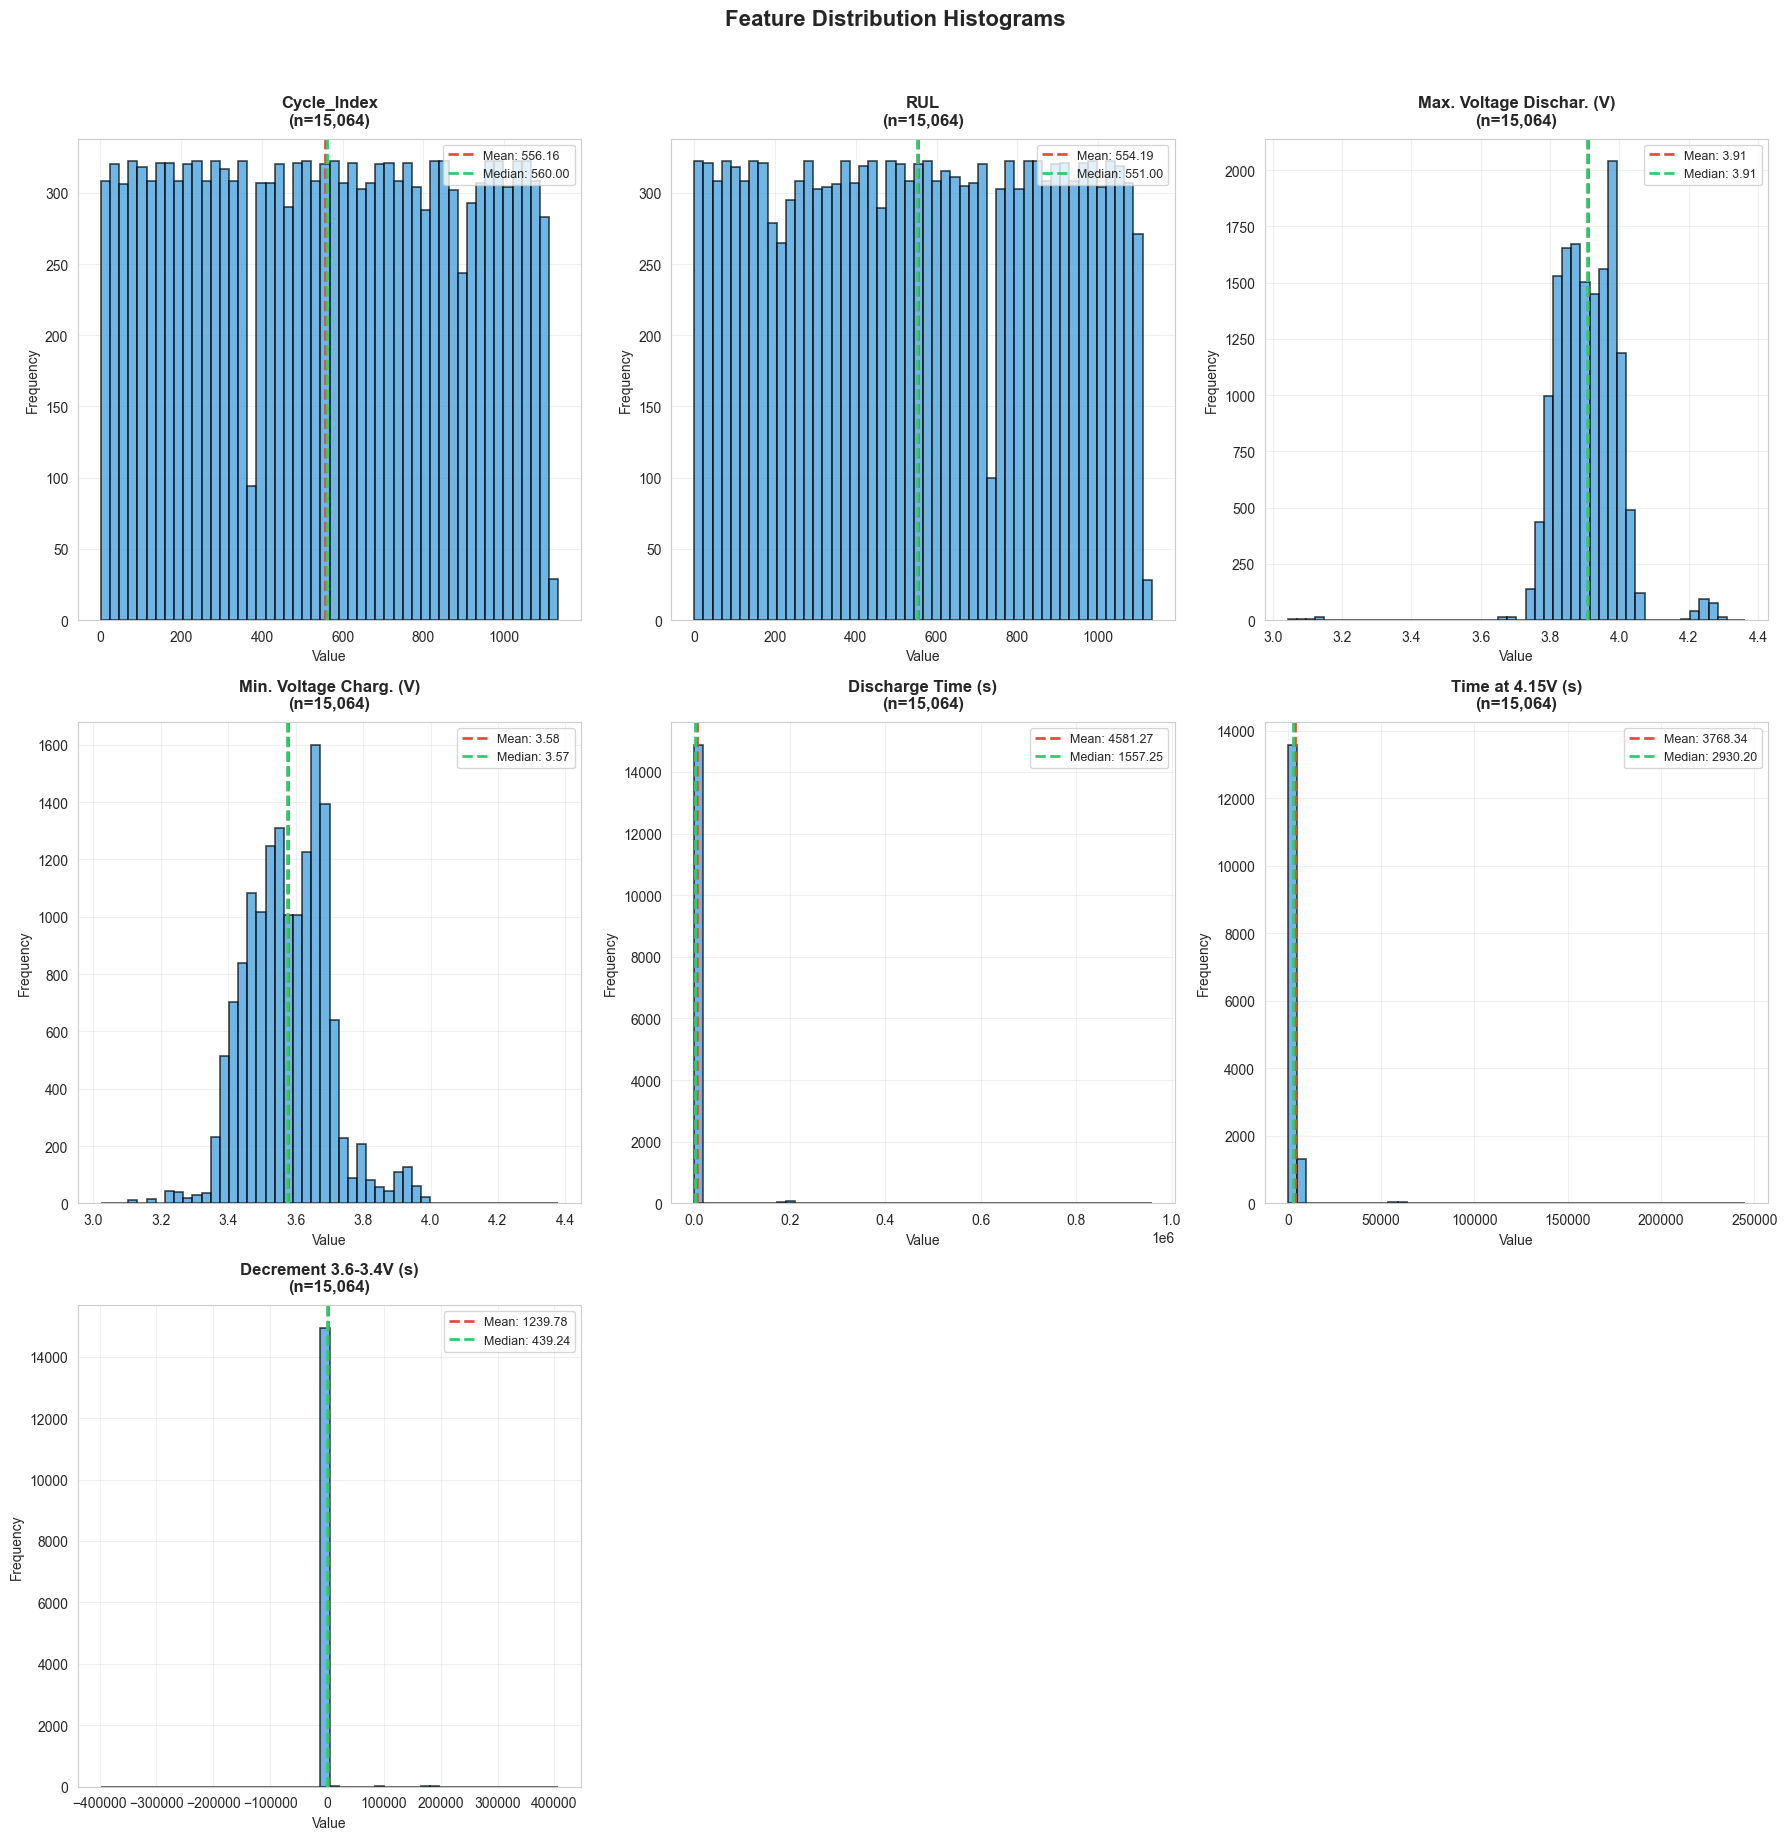

In [41]:
# Identify key features in the merged dataset
print("=" * 80)
print("IDENTIFYING KEY FEATURES FOR EDA")
print("=" * 80)

# List of potential feature names (case-insensitive matching)
potential_features = {
    'voltage': ['voltage', 'Voltage', 'VOLTAGE', 'V', 'v', 'Max. Voltage Dischar.', 'Min. Voltage Charg.'],
    'current': ['current', 'Current', 'CURRENT', 'I', 'i'],
    'temperature': ['temperature', 'Temperature', 'TEMPERATURE', 'temp', 'Temp', 'T'],
    'cycle_number': ['cycle_number', 'Cycle_Index', 'cycle_index', 'Cycle', 'cycle', 'Cycle Number'],
    'soh': ['soh', 'SOH', 'State of Health', 'state_of_health'],
    'rul': ['rul', 'RUL', 'Remaining Useful Life', 'remaining_useful_life']
}

# Find actual column names matching these features
found_features = {}
all_columns = merged_df.columns.tolist()

for feature_name, patterns in potential_features.items():
    for col in all_columns:
        if any(pattern in col for pattern in patterns):
            found_features[feature_name] = col
            break

print(f"\nKey features identified:")
for feature_name, col_name in found_features.items():
    print(f"  {feature_name}: '{col_name}'")

# Select features that exist in the dataset
features_to_plot = [col for col in found_features.values() if col in merged_df.columns]

# Also add any other numeric columns that might be interesting
other_numeric_cols = [col for col in merged_df.select_dtypes(include=[np.number]).columns 
                      if col not in features_to_plot][:3]  # Add up to 3 additional features

features_to_plot.extend(other_numeric_cols)
features_to_plot = list(set(features_to_plot))  # Remove duplicates

print(f"\nFeatures to visualize: {len(features_to_plot)}")
print(f"  {features_to_plot}")

# Create histograms
print("\n" + "=" * 80)
print("CREATING FEATURE DISTRIBUTION HISTOGRAMS")
print("=" * 80)

n_features = len(features_to_plot)
n_cols = 3
n_rows = (n_features + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 6 * n_rows))
axes = axes.flatten() if n_rows > 1 else [axes] if n_features == 1 else axes

for idx, feature in enumerate(features_to_plot):
    ax = axes[idx] if n_features > 1 else axes
    
    # Remove NaN values for plotting
    data_to_plot = merged_df[feature].dropna()
    
    if len(data_to_plot) > 0:
        # Create histogram
        n_bins = min(50, len(data_to_plot.unique()) if len(data_to_plot.unique()) < 50 else 50)
        ax.hist(data_to_plot, bins=n_bins, color='#3498db', alpha=0.7, edgecolor='black', linewidth=1.2)
        
        # Add statistics
        mean_val = data_to_plot.mean()
        median_val = data_to_plot.median()
        std_val = data_to_plot.std()
        
        ax.axvline(mean_val, color='#e74c3c', linestyle='--', linewidth=2, label=f'Mean: {mean_val:.2f}')
        ax.axvline(median_val, color='#2ecc71', linestyle='--', linewidth=2, label=f'Median: {median_val:.2f}')
        
        ax.set_title(f'{feature}\n(n={len(data_to_plot):,})', fontsize=12, fontweight='bold', pad=10)
        ax.set_xlabel('Value', fontsize=10)
        ax.set_ylabel('Frequency', fontsize=10)
        ax.legend(fontsize=9)
        ax.grid(True, alpha=0.3)
    else:
        ax.text(0.5, 0.5, 'No data available', ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'{feature}\n(No data)', fontsize=12, fontweight='bold')

# Hide empty subplots
for idx in range(len(features_to_plot), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Feature Distribution Histograms', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('feature_distributions.png', dpi=300, bbox_inches='tight')
print("✓ Histograms saved as 'feature_distributions.png'")
plt.show()


**Insights from Histograms:**
- **Distribution Shape**: Most features show their distribution patterns (normal, skewed, bimodal)
- **Central Tendency**: Mean and median values indicate typical ranges for each feature
- **Outliers**: Features with long tails suggest potential outliers that need investigation
- **Data Quality**: Features with unusual distributions may indicate data collection issues or require transformation


### 9.2 Correlation Heatmap

Analyze the correlation between features to identify relationships and potential multicollinearity. This helps in feature selection and understanding which variables move together.


CORRELATION HEATMAP ANALYSIS

Computing correlation matrix for 13 numeric columns...
✓ Correlation heatmap saved as 'correlation_heatmap.png'


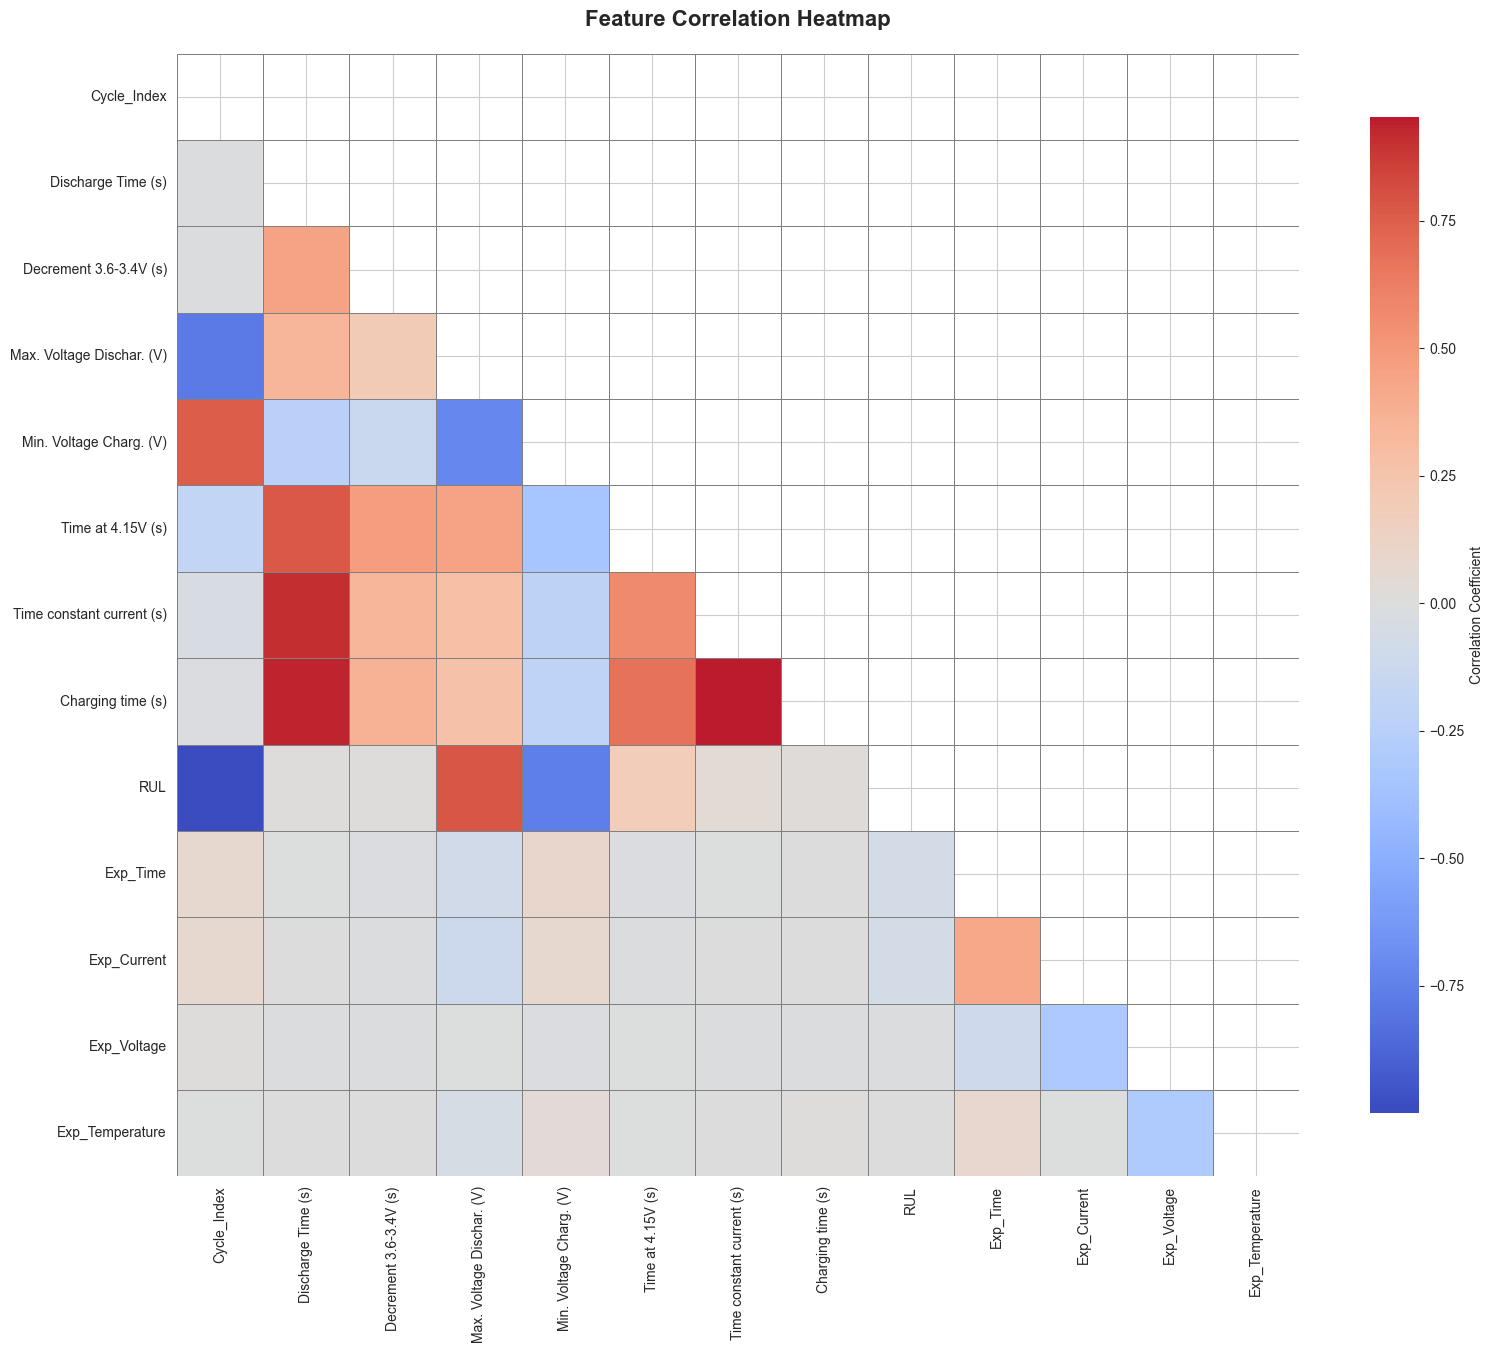


STRONG CORRELATIONS (|r| > 0.7)

Found 10 pairs with strong correlation (|r| > 0.7):


,Feature 1,Feature 2,Correlation
2,Cycle_Index,RUL,-0.999756
9,Time constant current (s),Charging time (s),0.953522
5,Discharge Time (s),Charging time (s),0.935544
4,Discharge Time (s),Time constant current (s),0.912536
0,Cycle_Index,Max. Voltage Dischar. (V),-0.782859
7,Max. Voltage Dischar. (V),RUL,0.782800
3,Discharge Time (s),Time at 4.15V (s),0.776720
1,Cycle_Index,Min. Voltage Charg. (V),0.759850
8,Min. Voltage Charg. (V),RUL,-0.759805
6,Max. Voltage Dischar. (V),Min. Voltage Charg. (V),-0.718182



CORRELATION SUMMARY STATISTICS
Total feature pairs analyzed: 78
Average absolute correlation: 0.213
Maximum correlation: 0.954
Minimum correlation: -1.000


In [42]:
# Select numeric columns for correlation analysis
print("=" * 80)
print("CORRELATION HEATMAP ANALYSIS")
print("=" * 80)

numeric_cols_for_corr = merged_df.select_dtypes(include=[np.number]).columns.tolist()

# Limit to reasonable number of columns for visualization
if len(numeric_cols_for_corr) > 30:
    # Select most important columns (those with higher variance or specific features)
    variance = merged_df[numeric_cols_for_corr].var().sort_values(ascending=False)
    numeric_cols_for_corr = variance.head(30).index.tolist()
    print(f"\n⚠ Large number of columns detected. Using top 30 columns by variance for visualization.")

print(f"\nComputing correlation matrix for {len(numeric_cols_for_corr)} numeric columns...")

# Calculate correlation matrix
correlation_matrix = merged_df[numeric_cols_for_corr].corr()

# Create heatmap
plt.figure(figsize=(16, 14))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))  # Mask upper triangle

sns.heatmap(
    correlation_matrix,
    mask=mask,
    annot=False,  # Set to True for values, but can be cluttered with many features
    cmap='coolwarm',
    center=0,
    square=True,
    fmt='.2f',
    cbar_kws={"shrink": 0.8, "label": "Correlation Coefficient"},
    linewidths=0.5,
    linecolor='gray'
)

plt.title('Feature Correlation Heatmap', fontsize=16, fontweight='bold', pad=20)
plt.tight_layout()
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')
print("✓ Correlation heatmap saved as 'correlation_heatmap.png'")
plt.show()

# Identify strong correlations (absolute value > 0.7)
print("\n" + "=" * 80)
print("STRONG CORRELATIONS (|r| > 0.7)")
print("=" * 80)

strong_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7 and not np.isnan(corr_value):
            col1 = correlation_matrix.columns[i]
            col2 = correlation_matrix.columns[j]
            strong_corr_pairs.append({
                'Feature 1': col1,
                'Feature 2': col2,
                'Correlation': corr_value
            })

if len(strong_corr_pairs) > 0:
    strong_corr_df = pd.DataFrame(strong_corr_pairs).sort_values('Correlation', key=abs, ascending=False)
    print(f"\nFound {len(strong_corr_pairs)} pairs with strong correlation (|r| > 0.7):")
    display(strong_corr_df)
else:
    print("\n✓ No very strong correlations (|r| > 0.7) found between features.")

# Summary statistics
print(f"\n" + "=" * 80)
print("CORRELATION SUMMARY STATISTICS")
print("=" * 80)
print(f"Total feature pairs analyzed: {len(correlation_matrix) * (len(correlation_matrix) - 1) // 2}")
print(f"Average absolute correlation: {correlation_matrix.abs().values[np.triu_indices_from(correlation_matrix.values, k=1)].mean():.3f}")
print(f"Maximum correlation: {correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)].max():.3f}")
print(f"Minimum correlation: {correlation_matrix.values[np.triu_indices_from(correlation_matrix.values, k=1)].min():.3f}")


**Insights from Correlation Heatmap:**
- **High Positive Correlation (r > 0.7)**: Features that increase together - may indicate redundancy for modeling
- **High Negative Correlation (r < -0.7)**: Features with inverse relationships - useful for understanding battery behavior
- **Weak Correlations (|r| < 0.3)**: Independent features that may contribute unique information
- **Target Relationships**: Strong correlations with RUL/SOH indicate important predictive features
- **Multicollinearity**: Highly correlated features may need feature engineering or removal to avoid overfitting


### 9.3 Outlier Detection - Boxplots

Use boxplots to detect outliers in key features. Outliers can significantly impact model performance and may indicate data quality issues or genuine extreme values.


OUTLIER DETECTION USING BOXPLOTS

Analyzing 7 features for outliers...
✓ Boxplots saved as 'outlier_detection_boxplots.png'


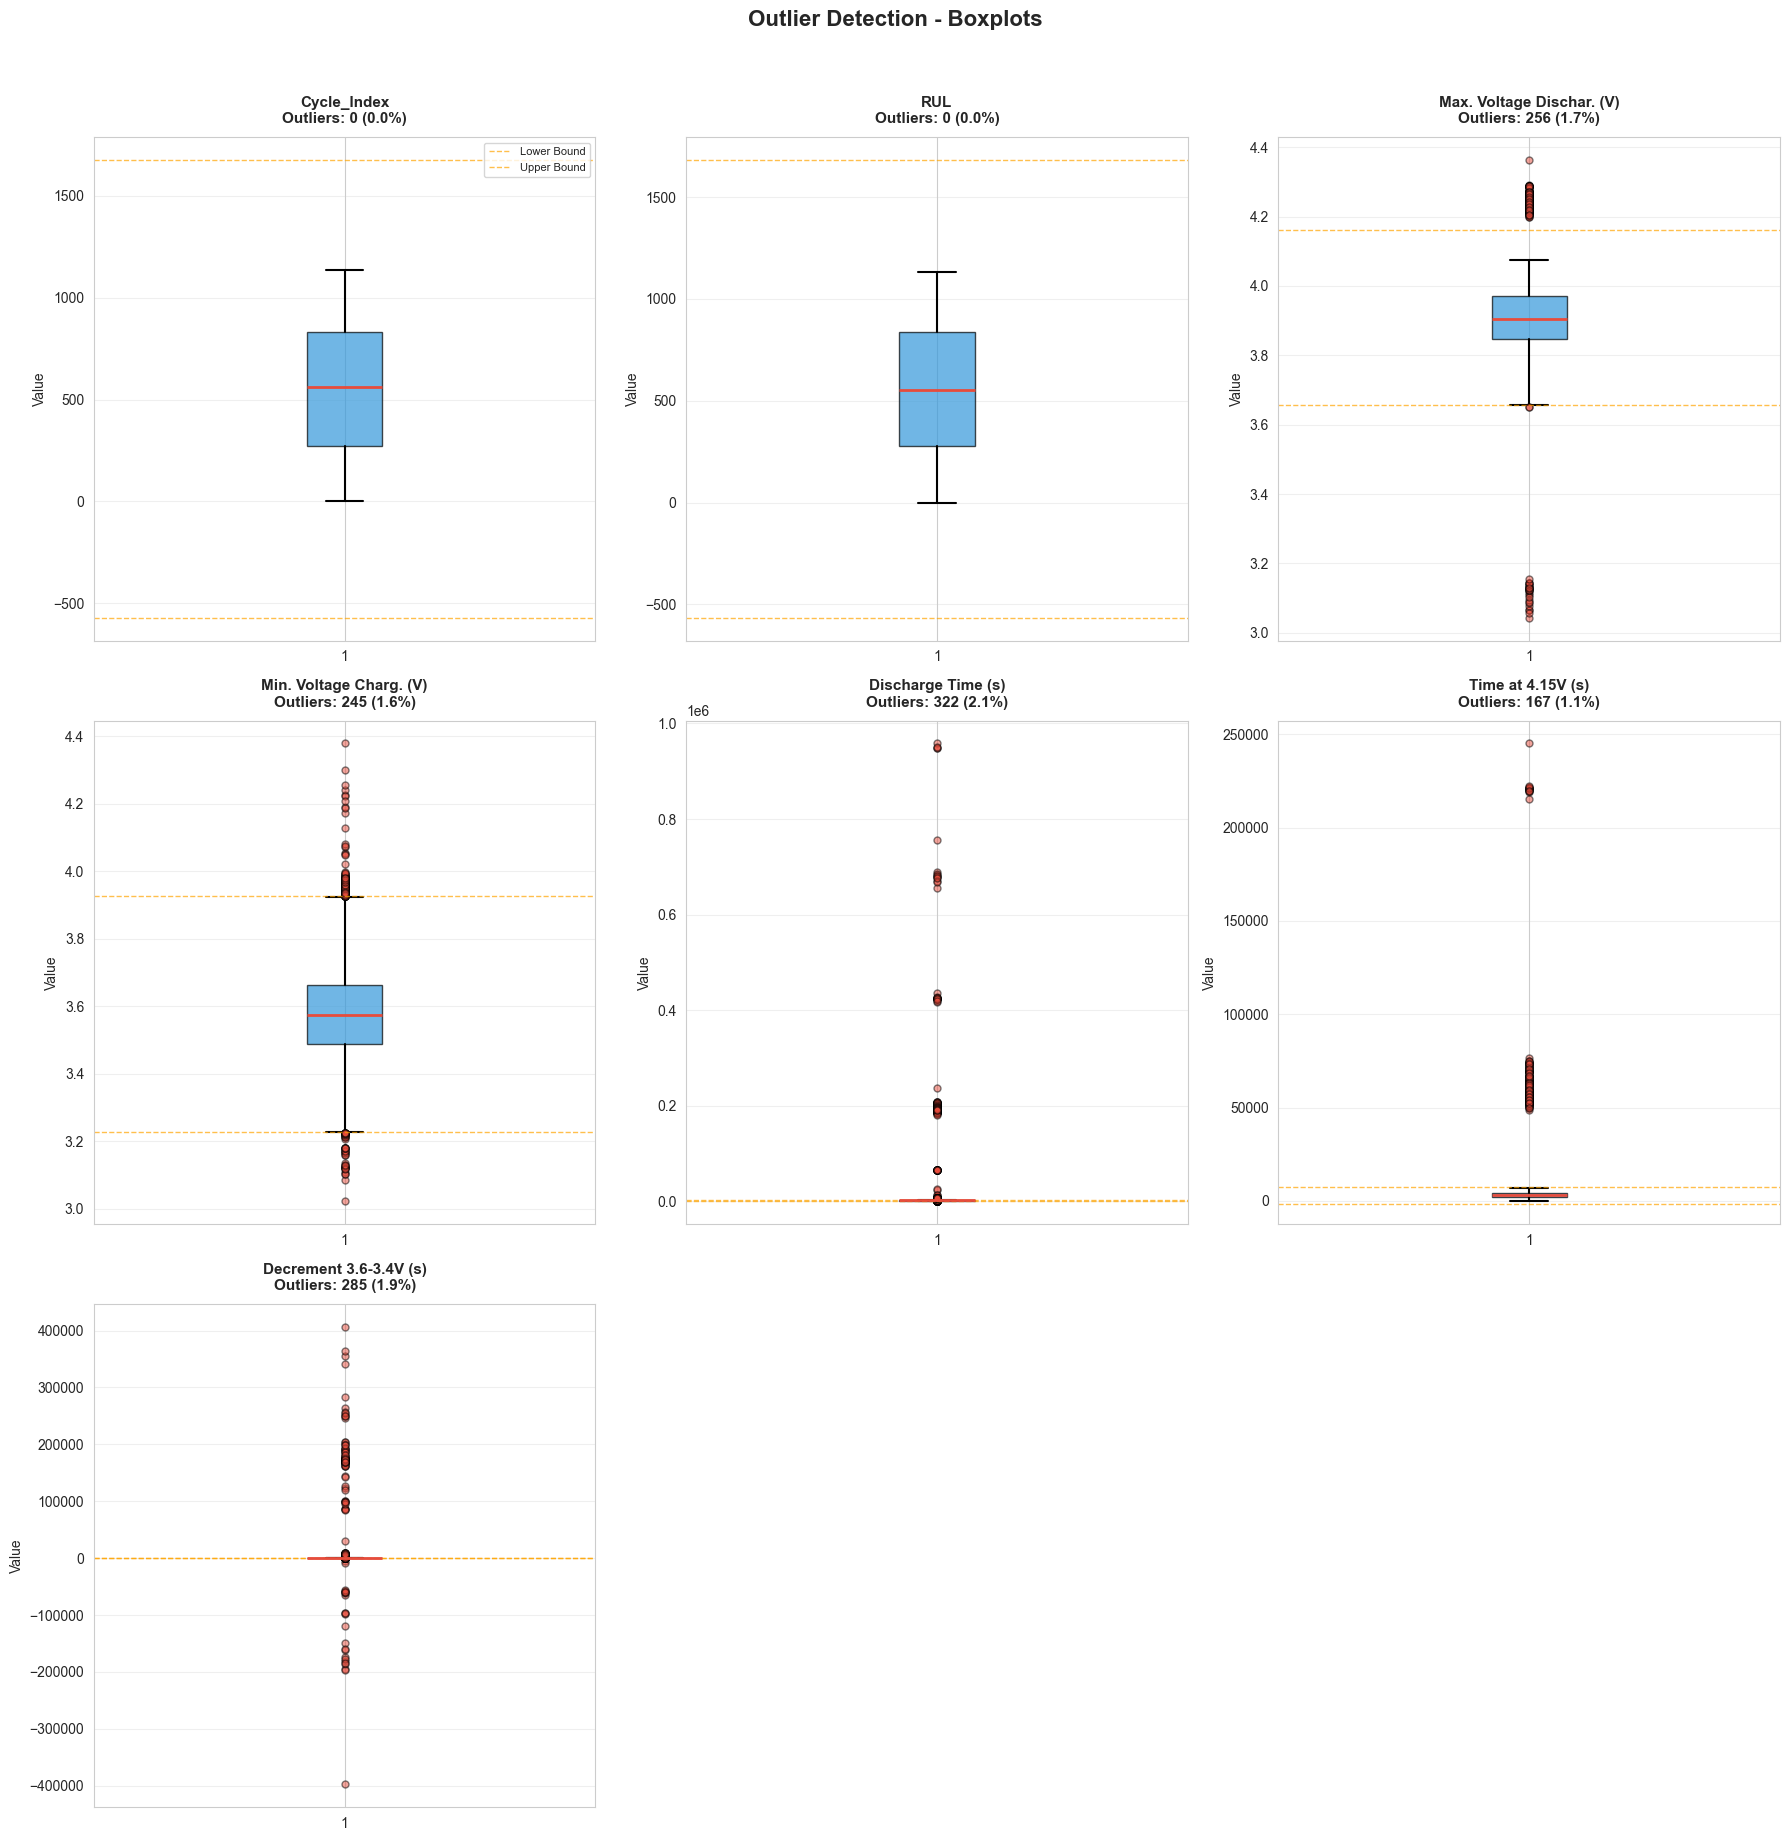


OUTLIER SUMMARY


,Feature,Total Values,Outliers Count,Outlier Percentage,Lower Bound,Upper Bound
0,Cycle_Index,15064,0,0.00%,-572.00,1676.00
1,RUL,15064,0,0.00%,-566.00,1682.00
2,Max. Voltage Dischar. (V),15064,256,1.70%,3.66,4.16
3,Min. Voltage Charg. (V),15064,245,1.63%,3.23,3.93
4,Discharge Time (s),15064,322,2.14%,61.27,3016.03
5,Time at 4.15V (s),15064,167,1.11%,-1560.28,7477.49
6,Decrement 3.6-3.4V (s),15064,285,1.89%,-101.00,1020.60



Overall Statistics:
  Total outliers detected: 1,275
  Total values analyzed: 105,448
  Overall outlier rate: 1.21%


In [43]:
# Select key features for outlier detection
print("=" * 80)
print("OUTLIER DETECTION USING BOXPLOTS")
print("=" * 80)

# Use the same key features identified earlier, or select top numeric columns
outlier_features = features_to_plot[:12] if len(features_to_plot) >= 12 else features_to_plot

print(f"\nAnalyzing {len(outlier_features)} features for outliers...")

# Create boxplots
n_features_box = len(outlier_features)
n_cols_box = 3
n_rows_box = (n_features_box + n_cols_box - 1) // n_cols_box

fig, axes = plt.subplots(n_rows_box, n_cols_box, figsize=(18, 6 * n_rows_box))
axes = axes.flatten() if n_rows_box > 1 else [axes] if n_features_box == 1 else axes

outlier_summary = []

for idx, feature in enumerate(outlier_features):
    ax = axes[idx] if n_features_box > 1 else axes
    
    # Remove NaN values
    data_to_plot = merged_df[feature].dropna()
    
    if len(data_to_plot) > 0:
        # Create boxplot
        bp = ax.boxplot(data_to_plot, vert=True, patch_artist=True, 
                       boxprops=dict(facecolor='#3498db', alpha=0.7),
                       medianprops=dict(color='#e74c3c', linewidth=2),
                       whiskerprops=dict(color='black', linewidth=1.5),
                       capprops=dict(color='black', linewidth=1.5),
                       flierprops=dict(marker='o', markerfacecolor='#e74c3c', 
                                      markersize=5, alpha=0.5, markeredgecolor='black'))
        
        # Calculate IQR and outliers
        Q1 = data_to_plot.quantile(0.25)
        Q3 = data_to_plot.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = data_to_plot[(data_to_plot < lower_bound) | (data_to_plot > upper_bound)]
        outlier_count = len(outliers)
        outlier_percent = (outlier_count / len(data_to_plot)) * 100
        
        outlier_summary.append({
            'Feature': feature,
            'Total Values': len(data_to_plot),
            'Outliers Count': outlier_count,
            'Outlier Percentage': f"{outlier_percent:.2f}%",
            'Lower Bound': f"{lower_bound:.2f}",
            'Upper Bound': f"{upper_bound:.2f}"
        })
        
        # Add statistics to plot
        ax.set_title(f'{feature}\nOutliers: {outlier_count} ({outlier_percent:.1f}%)', 
                    fontsize=11, fontweight='bold', pad=10)
        ax.set_ylabel('Value', fontsize=10)
        ax.grid(True, alpha=0.3, axis='y')
        
        # Add outlier bounds as reference lines
        ax.axhline(lower_bound, color='orange', linestyle='--', linewidth=1, alpha=0.7, label='Lower Bound')
        ax.axhline(upper_bound, color='orange', linestyle='--', linewidth=1, alpha=0.7, label='Upper Bound')
        if idx == 0:  # Add legend only once
            ax.legend(fontsize=8, loc='upper right')
    else:
        ax.text(0.5, 0.5, 'No data available', ha='center', va='center', transform=ax.transAxes)
        ax.set_title(f'{feature}\n(No data)', fontsize=11, fontweight='bold')

# Hide empty subplots
for idx in range(len(outlier_features), len(axes)):
    axes[idx].set_visible(False)

plt.suptitle('Outlier Detection - Boxplots', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.savefig('outlier_detection_boxplots.png', dpi=300, bbox_inches='tight')
print("✓ Boxplots saved as 'outlier_detection_boxplots.png'")
plt.show()

# Display outlier summary
print("\n" + "=" * 80)
print("OUTLIER SUMMARY")
print("=" * 80)

if len(outlier_summary) > 0:
    outlier_df = pd.DataFrame(outlier_summary)
    display(outlier_df)
    
    total_outliers = outlier_df['Outliers Count'].sum()
    total_values = outlier_df['Total Values'].sum()
    overall_outlier_rate = (total_outliers / total_values) * 100
    
    print(f"\nOverall Statistics:")
    print(f"  Total outliers detected: {total_outliers:,}")
    print(f"  Total values analyzed: {total_values:,}")
    print(f"  Overall outlier rate: {overall_outlier_rate:.2f}%")
    
    # Identify features with high outlier rates (>5%)
    high_outlier_features = outlier_df[outlier_df['Outliers Count'] / outlier_df['Total Values'] > 0.05]
    if len(high_outlier_features) > 0:
        print(f"\n⚠ Features with >5% outliers:")
        for _, row in high_outlier_features.iterrows():
            print(f"  - {row['Feature']}: {row['Outlier Percentage']} outliers")
else:
    print("No outliers detected or no data available for analysis.")


**Insights from Boxplots:**
- **Outlier Identification**: Features with many points beyond whiskers indicate potential outliers
- **Distribution Skewness**: Asymmetric boxplots show skewed distributions (positive/negative skew)
- **Data Quality**: Extreme outliers may indicate measurement errors or need for data transformation
- **Feature Engineering**: Outliers in key features may require log transformation or robust scaling
- **Model Considerations**: Models sensitive to outliers (e.g., linear regression) may need outlier treatment


### 9.4 Feature Relationships - Pairplots

Create pairplots to visualize pairwise relationships between key features. This helps identify non-linear relationships and patterns that may not be captured by correlation alone.


FEATURE RELATIONSHIPS - PAIRPLOTS

Features selected for pairplot: 6
  ['Cycle_Index', 'Time constant current (s)', 'Exp_Temperature', 'RUL', 'Max. Voltage Dischar. (V)', 'Discharge Time (s)']

Data points available: 15,064
⚠ Sampling 5,000 points for visualization (original: 15,064)

Creating pairplot (this may take a moment)...
✓ Pairplot saved as 'feature_pairplots.png'


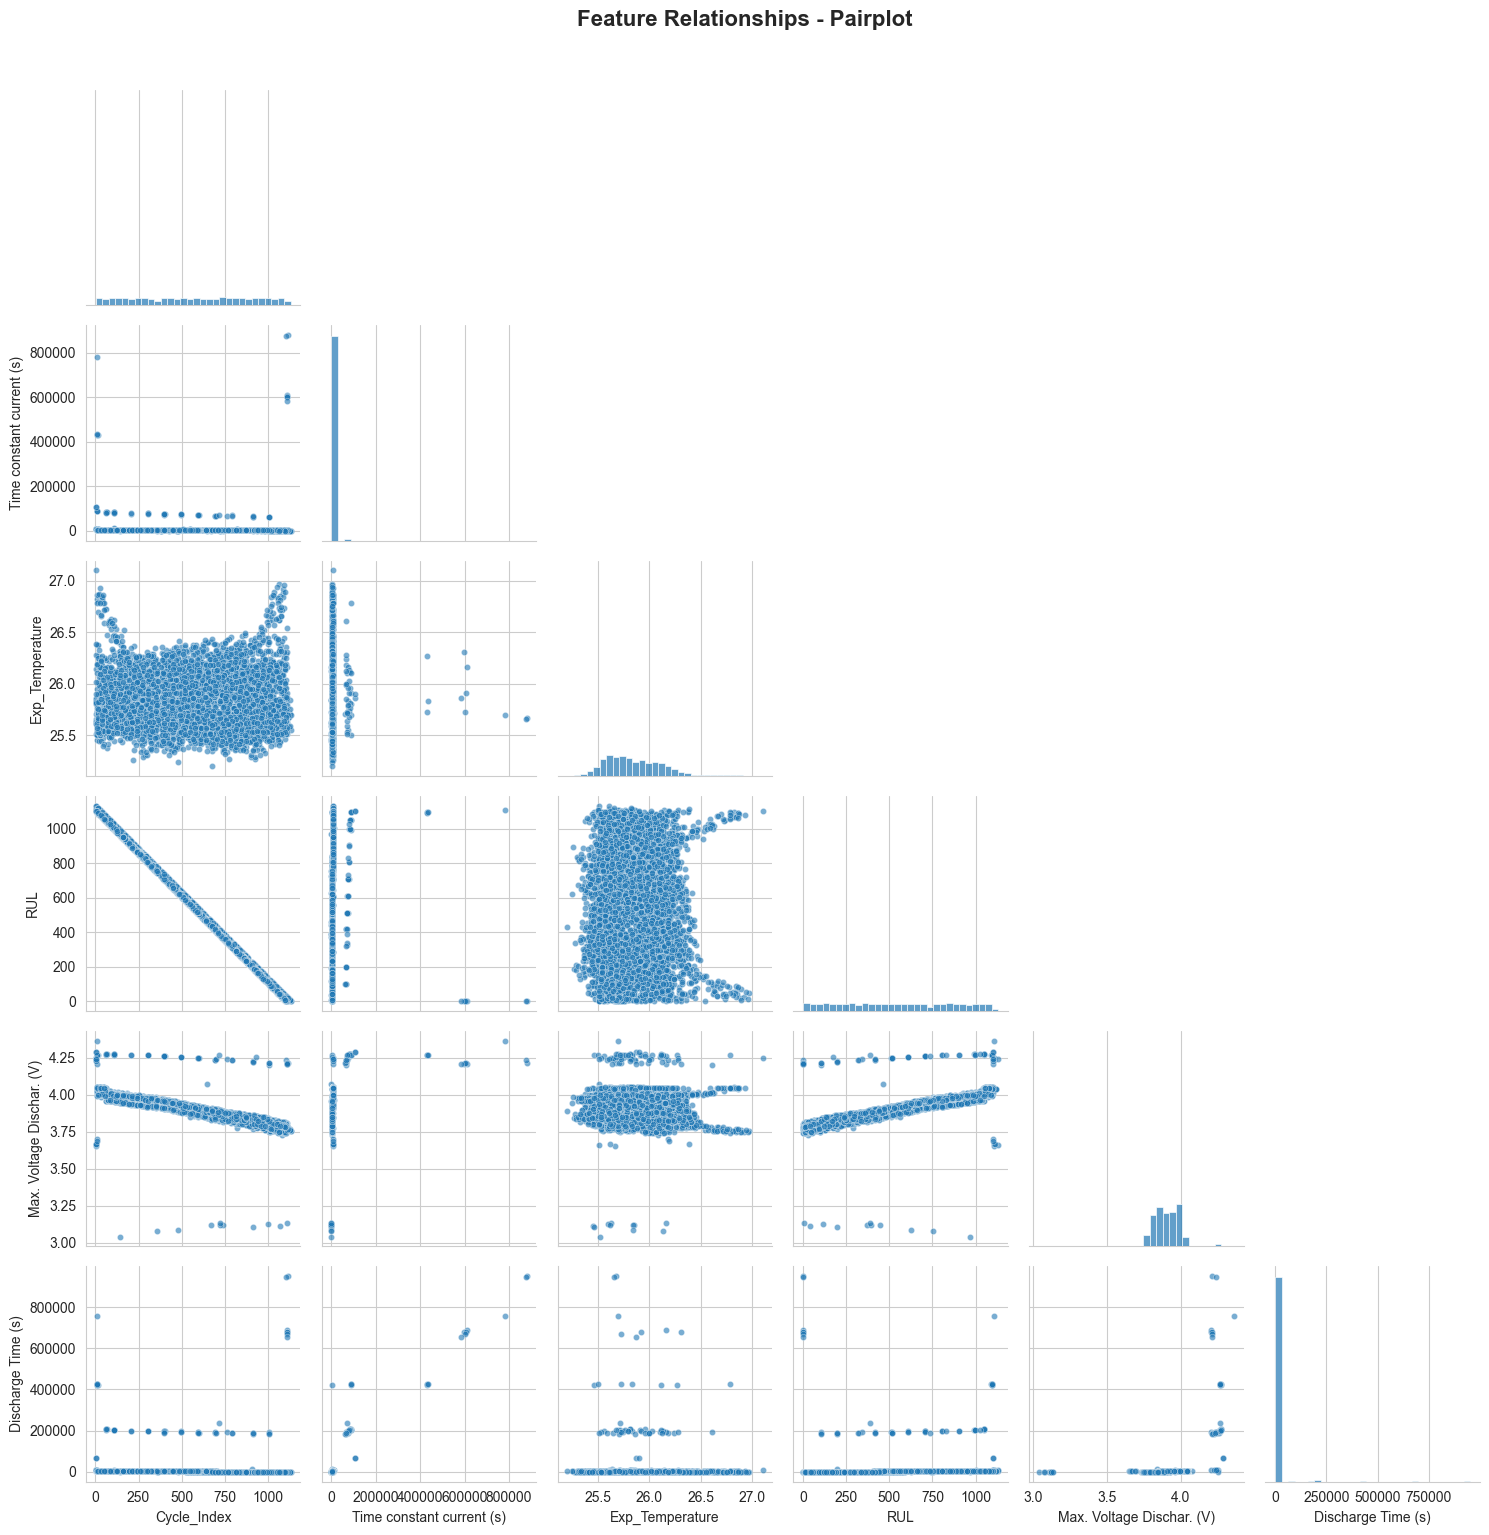


KEY RELATIONSHIP ANALYSIS

Analyzing relationships with RUL (target variable)...
✓ RUL relationship plots saved as 'rul_relationships.png'


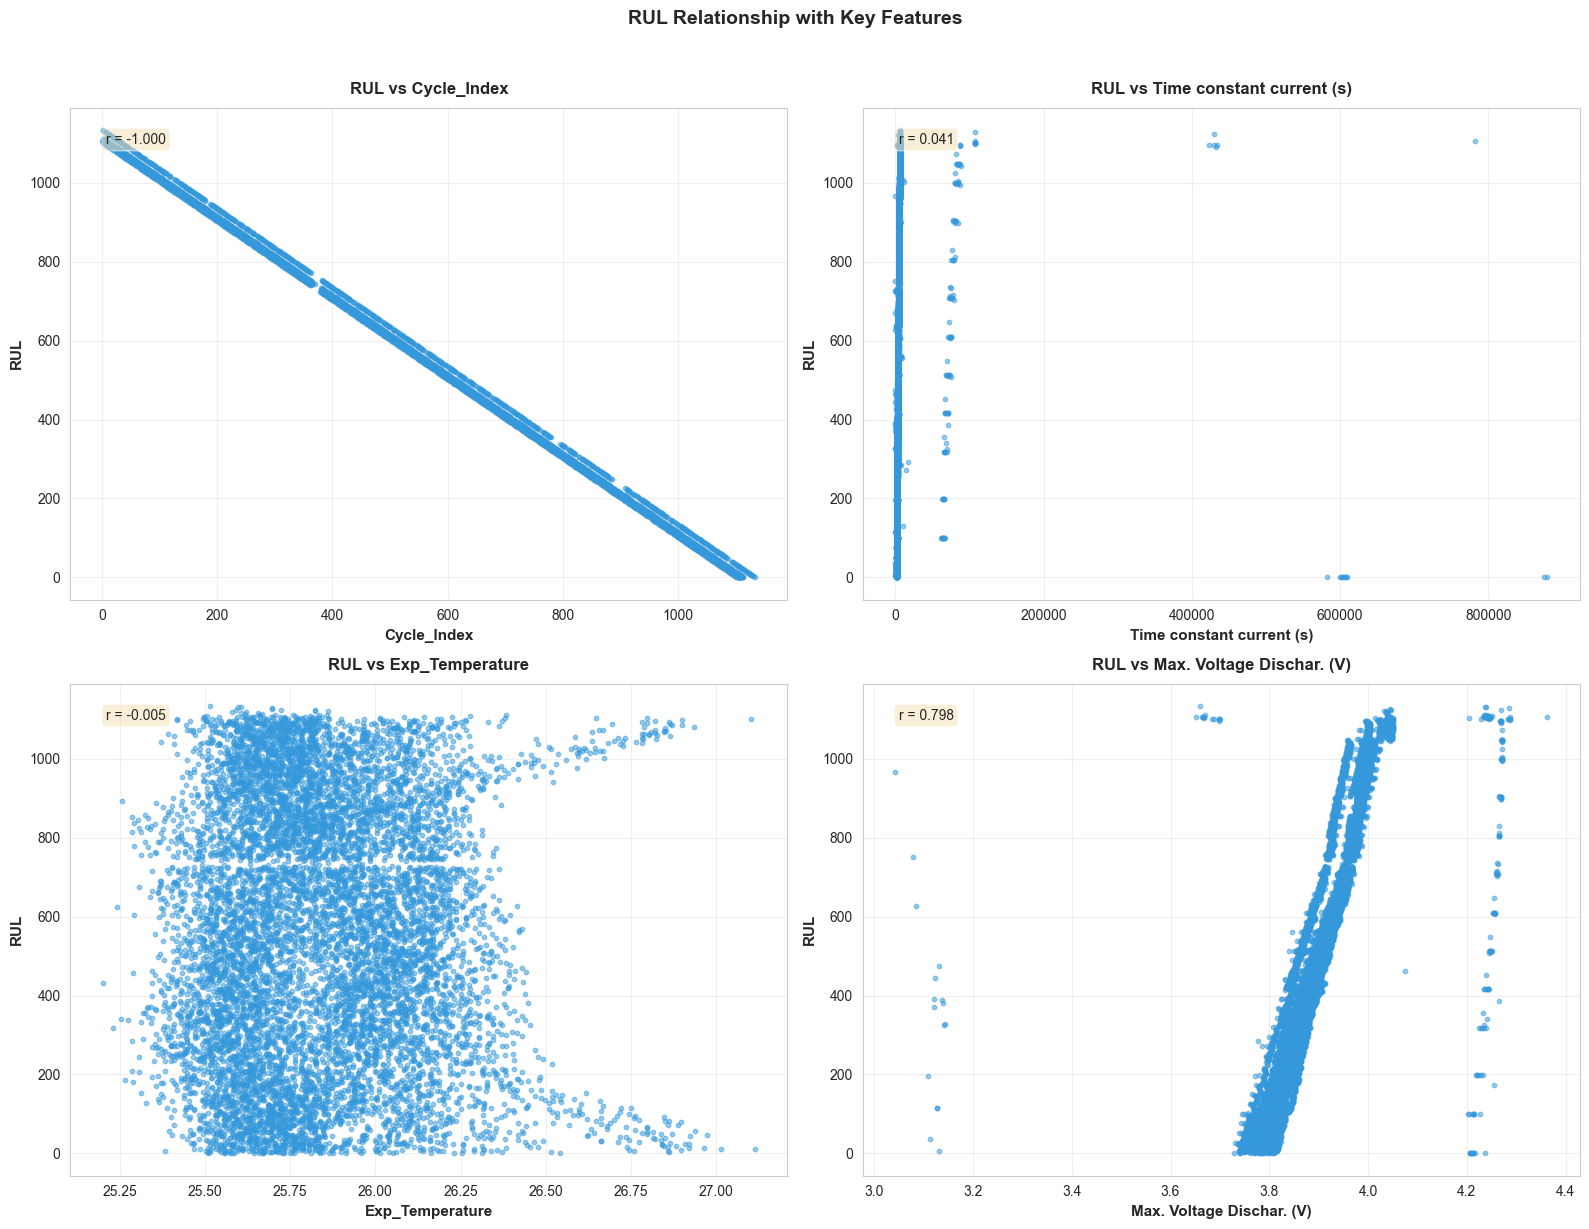

In [44]:
# Select features for pairplot (limit to 6-8 features for readability)
print("=" * 80)
print("FEATURE RELATIONSHIPS - PAIRPLOTS")
print("=" * 80)

# Prioritize important features: RUL, SOH, and key battery metrics
pairplot_features = []

# Add target variables if they exist
if 'RUL' in merged_df.columns:
    pairplot_features.append('RUL')
if 'soh' in merged_df.columns or 'SOH' in merged_df.columns:
    soh_col = 'soh' if 'soh' in merged_df.columns else 'SOH'
    pairplot_features.append(soh_col)

# Add key battery features
key_battery_features = ['Voltage', 'Current', 'Temperature', 'Cycle_Index', 'cycle_number']
for feat in key_battery_features:
    # Check for variations
    matching_cols = [col for col in merged_df.columns if feat.lower() in col.lower()]
    if matching_cols and matching_cols[0] not in pairplot_features:
        pairplot_features.append(matching_cols[0])

# Limit to 6-7 features for performance and readability
pairplot_features = pairplot_features[:7]

# Fill remaining slots with other numeric columns if needed
if len(pairplot_features) < 6:
    remaining_numeric = [col for col in merged_df.select_dtypes(include=[np.number]).columns 
                        if col not in pairplot_features][:6-len(pairplot_features)]
    pairplot_features.extend(remaining_numeric)

pairplot_features = list(set(pairplot_features))[:7]  # Ensure unique and limit to 7

print(f"\nFeatures selected for pairplot: {len(pairplot_features)}")
print(f"  {pairplot_features}")

# Filter data to remove NaN values for pairplot features
data_for_pairplot = merged_df[pairplot_features].dropna()

print(f"\nData points available: {len(data_for_pairplot):,}")

if len(data_for_pairplot) > 0 and len(pairplot_features) > 1:
    # Sample data if too large (for performance)
    max_samples = 5000
    if len(data_for_pairplot) > max_samples:
        data_for_pairplot = data_for_pairplot.sample(n=max_samples, random_state=42)
        print(f"⚠ Sampling {max_samples:,} points for visualization (original: {len(merged_df[pairplot_features].dropna()):,})")
    
    # Create pairplot
    print("\nCreating pairplot (this may take a moment)...")
    pairplot = sns.pairplot(
        data_for_pairplot,
        diag_kind='hist',
        plot_kws={'alpha': 0.6, 's': 20},
        diag_kws={'bins': 30, 'alpha': 0.7},
        corner=True  # Only show lower triangle
    )
    
    pairplot.fig.suptitle('Feature Relationships - Pairplot', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.savefig('feature_pairplots.png', dpi=300, bbox_inches='tight')
    print("✓ Pairplot saved as 'feature_pairplots.png'")
    plt.show()
    
    # Additional analysis: scatter plots for key relationships
    print("\n" + "=" * 80)
    print("KEY RELATIONSHIP ANALYSIS")
    print("=" * 80)
    
    # If RUL exists, create specific relationship plots
    if 'RUL' in pairplot_features:
        print("\nAnalyzing relationships with RUL (target variable)...")
        
        other_features = [f for f in pairplot_features if f != 'RUL']
        if len(other_features) >= 4:
            fig, axes = plt.subplots(2, 2, figsize=(16, 12))
            axes = axes.flatten()
            
            for idx, feature in enumerate(other_features[:4]):
                ax = axes[idx]
                data_subset = merged_df[[feature, 'RUL']].dropna()
                
                if len(data_subset) > 10000:
                    data_subset = data_subset.sample(n=10000, random_state=42)
                
                ax.scatter(data_subset[feature], data_subset['RUL'], alpha=0.5, s=10, color='#3498db')
                ax.set_xlabel(feature, fontsize=11, fontweight='bold')
                ax.set_ylabel('RUL', fontsize=11, fontweight='bold')
                ax.set_title(f'RUL vs {feature}', fontsize=12, fontweight='bold', pad=10)
                ax.grid(True, alpha=0.3)
                
                # Add correlation annotation
                corr = data_subset[feature].corr(data_subset['RUL'])
                ax.text(0.05, 0.95, f'r = {corr:.3f}', transform=ax.transAxes,
                       fontsize=10, verticalalignment='top',
                       bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
            
            plt.suptitle('RUL Relationship with Key Features', fontsize=14, fontweight='bold', y=1.02)
            plt.tight_layout()
            plt.savefig('rul_relationships.png', dpi=300, bbox_inches='tight')
            print("✓ RUL relationship plots saved as 'rul_relationships.png'")
            plt.show()
    
else:
    print("\n⚠ Insufficient data for pairplot. Need at least 2 features with non-null values.")


**Insights from Pairplots:**
- **Linear Relationships**: Diagonal scatter patterns indicate linear correlations between features
- **Non-linear Patterns**: Curved or clustered patterns suggest non-linear relationships that may require polynomial features
- **Clustering**: Groups of points may indicate different battery states or operating conditions
- **Outlier Detection**: Isolated points in scatter plots highlight outliers that affect relationships
- **Target Relationships**: Patterns with RUL/SOH show which features are most predictive
- **Feature Interactions**: Complex relationships suggest potential for interaction features in modeling


### 9.5 EDA Summary

Key findings and recommendations based on the exploratory data analysis.


## 10. Feature Engineering

This section creates new features from existing ones and applies scaling to prepare the data for machine learning models. Feature engineering helps improve model performance by capturing domain knowledge and ensuring features are on appropriate scales.


### 10.1 Create New Features

Create derived features that capture important relationships and patterns in battery data:
- **voltage_drop**: Difference between maximum and minimum voltage (indicates battery degradation)
- **energy_density**: Product of voltage and current (represents power/energy characteristics)


In [45]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

print("=" * 80)
print("FEATURE ENGINEERING")
print("=" * 80)

# Create a copy of the merged dataset for feature engineering
featured_df = merged_df.copy()

print(f"\nInitial dataset shape: {featured_df.shape}")
print(f"Initial columns: {len(featured_df.columns)}")

# Track newly created features
new_features = []

print("\n" + "-" * 80)
print("Creating New Features")
print("-" * 80)

# 1. Voltage Drop Feature
print("\n1. Creating voltage_drop feature...")
voltage_cols = [col for col in featured_df.columns if 'voltage' in col.lower() or 'Voltage' in col]

# Look for max and min voltage columns
max_voltage_cols = [col for col in voltage_cols if 'max' in col.lower() or 'Max' in col]
min_voltage_cols = [col for col in voltage_cols if 'min' in col.lower() or 'Min' in col]

# Alternative: look for voltage columns and find max/min
if not max_voltage_cols or not min_voltage_cols:
    # Try to find any voltage column
    voltage_col = None
    for col in featured_df.columns:
        if 'voltage' in col.lower() and 'dischar' in col.lower():
            voltage_col = col
            break
    
    if voltage_col is None:
        voltage_col = [col for col in featured_df.columns if 'voltage' in col.lower() or 'V' == col][0] if any('voltage' in col.lower() or col == 'V' for col in featured_df.columns) else None
    
    if voltage_col:
        # Calculate voltage drop using max and min of the voltage column
        if len(featured_df[voltage_col].dropna()) > 0:
            max_voltage = featured_df[voltage_col].max()
            min_voltage = featured_df[voltage_col].min()
            featured_df['voltage_drop'] = max_voltage - featured_df[voltage_col]
            new_features.append('voltage_drop')
            print(f"   ✓ Created 'voltage_drop' from {voltage_col}")
            print(f"   ✓ Range: {featured_df['voltage_drop'].min():.4f} to {featured_df['voltage_drop'].max():.4f}")
        else:
            print(f"   ⚠ Could not create voltage_drop: insufficient data in {voltage_col}")
    elif max_voltage_cols and min_voltage_cols:
        # Use max and min voltage columns directly
        max_col = max_voltage_cols[0]
        min_col = min_voltage_cols[0]
        if max_col in featured_df.columns and min_col in featured_df.columns:
            featured_df['voltage_drop'] = featured_df[max_col] - featured_df[min_col]
            new_features.append('voltage_drop')
            print(f"   ✓ Created 'voltage_drop' = {max_col} - {min_col}")
            print(f"   ✓ Range: {featured_df['voltage_drop'].min():.4f} to {featured_df['voltage_drop'].max():.4f}")
        else:
            print(f"   ⚠ Could not create voltage_drop: columns not found")
    else:
        print(f"   ⚠ Could not create voltage_drop: voltage columns not found")
        print(f"   Available columns with 'voltage': {voltage_cols[:5]}")
else:
    # Direct max and min voltage columns found
    max_col = max_voltage_cols[0]
    min_col = min_voltage_cols[0]
    featured_df['voltage_drop'] = featured_df[max_col] - featured_df[min_col]
    new_features.append('voltage_drop')
    print(f"   ✓ Created 'voltage_drop' = {max_col} - {min_col}")
    print(f"   ✓ Range: {featured_df['voltage_drop'].min():.4f} to {featured_df['voltage_drop'].max():.4f}")

# 2. Energy Density Feature
print("\n2. Creating energy_density feature...")
voltage_for_energy = None
current_for_energy = None

# Find voltage column
for col in featured_df.columns:
    if 'voltage' in col.lower() and voltage_for_energy is None:
        voltage_for_energy = col
        break

# Find current column
for col in featured_df.columns:
    if 'current' in col.lower() or col == 'I' or col == 'i':
        current_for_energy = col
        break

if voltage_for_energy and current_for_energy:
    if voltage_for_energy in featured_df.columns and current_for_energy in featured_df.columns:
        # Calculate energy density (voltage * current)
        featured_df['energy_density'] = featured_df[voltage_for_energy] * featured_df[current_for_energy]
        new_features.append('energy_density')
        print(f"   ✓ Created 'energy_density' = {voltage_for_energy} * {current_for_energy}")
        print(f"   ✓ Range: {featured_df['energy_density'].min():.4f} to {featured_df['energy_density'].max():.4f}")
        print(f"   ✓ Mean: {featured_df['energy_density'].mean():.4f}, Std: {featured_df['energy_density'].std():.4f}")
    else:
        print(f"   ⚠ Could not create energy_density: columns not in dataset")
else:
    print(f"   ⚠ Could not create energy_density:")
    if not voltage_for_energy:
        print(f"      - Voltage column not found")
    if not current_for_energy:
        print(f"      - Current column not found")

# Additional feature: Try to create more derived features if possible
print("\n3. Creating additional derived features...")

# Temperature variation (if temperature exists)
temp_cols = [col for col in featured_df.columns if 'temperature' in col.lower() or 'temp' in col.lower() or col == 'T']
if temp_cols:
    temp_col = temp_cols[0]
    if len(featured_df[temp_col].dropna()) > 0:
        temp_mean = featured_df[temp_col].mean()
        featured_df['temp_deviation'] = featured_df[temp_col] - temp_mean
        new_features.append('temp_deviation')
        print(f"   ✓ Created 'temp_deviation' from {temp_col}")

# Cycle-based features if Cycle_Index exists
if 'Cycle_Index' in featured_df.columns:
    featured_df['cycle_squared'] = featured_df['Cycle_Index'] ** 2
    new_features.append('cycle_squared')
    print(f"   ✓ Created 'cycle_squared' feature")

print(f"\n✓ Total new features created: {len(new_features)}")
print(f"   New features: {new_features}")
print(f"\nUpdated dataset shape: {featured_df.shape}")
print(f"Total columns after feature engineering: {len(featured_df.columns)}")


FEATURE ENGINEERING

Initial dataset shape: (15064, 14)
Initial columns: 14

--------------------------------------------------------------------------------
Creating New Features
--------------------------------------------------------------------------------

1. Creating voltage_drop feature...
   ✓ Created 'voltage_drop' = Max. Voltage Dischar. (V) - Min. Voltage Charg. (V)
   ✓ Range: -0.5600 to 1.3410

2. Creating energy_density feature...
   ✓ Created 'energy_density' = Max. Voltage Dischar. (V) * Time constant current (s)
   ✓ Range: 18.3347 to 3710485.7795
   ✓ Mean: 22000.3086, Std: 106586.7529

3. Creating additional derived features...
   ✓ Created 'temp_deviation' from Exp_Temperature
   ✓ Created 'cycle_squared' feature

✓ Total new features created: 4
   New features: ['voltage_drop', 'energy_density', 'temp_deviation', 'cycle_squared']

Updated dataset shape: (15064, 18)
Total columns after feature engineering: 18


### 10.2 Feature Scaling

Apply scaling to numerical features to ensure all features are on similar scales. This is crucial for many machine learning algorithms that are sensitive to feature magnitudes.

**Scaling Options:**
- **StandardScaler**: Z-score normalization (mean=0, std=1) - good for features with normal distributions
- **MinMaxScaler**: Min-max normalization (0-1 range) - good when you need bounded values


In [46]:
print("\n" + "=" * 80)
print("FEATURE SCALING")
print("=" * 80)

# Identify columns to scale (numeric columns, excluding target variables)
target_vars = ['RUL', 'rul', 'SOH', 'soh', 'Cycle_Index', 'cycle_number']

# Get numeric columns excluding target variables
columns_to_scale = [col for col in featured_df.select_dtypes(include=[np.number]).columns 
                   if col not in target_vars]

print(f"\nColumns to scale: {len(columns_to_scale)}")
print(f"Sample columns: {columns_to_scale[:10]}...")

# Store original values for comparison (sample)
print("\n" + "-" * 80)
print("Before Scaling (sample statistics):")
print("-" * 80)
sample_stats_before = featured_df[columns_to_scale[:5]].describe()
display(sample_stats_before.head())

# Choose scaling method
# Using StandardScaler for better handling of outliers
# You can switch to MinMaxScaler if needed
scaler_type = 'StandardScaler'  # Options: 'StandardScaler' or 'MinMaxScaler'

print(f"\n" + "-" * 80)
print(f"Applying {scaler_type}...")
print("-" * 80)

if scaler_type == 'StandardScaler':
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(featured_df[columns_to_scale])
    featured_df_scaled = featured_df.copy()
    featured_df_scaled[columns_to_scale] = scaled_data
    
    print(f"✓ Applied StandardScaler (z-score normalization)")
    print(f"   - Mean centering: features will have mean ≈ 0")
    print(f"   - Standard deviation: features will have std ≈ 1")
    
elif scaler_type == 'MinMaxScaler':
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(featured_df[columns_to_scale])
    featured_df_scaled = featured_df.copy()
    featured_df_scaled[columns_to_scale] = scaled_data
    
    print(f"✓ Applied MinMaxScaler (min-max normalization)")
    print(f"   - Range: features will be scaled to [0, 1]")

# Display after scaling statistics
print("\n" + "-" * 80)
print("After Scaling (sample statistics):")
print("-" * 80)
sample_stats_after = featured_df_scaled[columns_to_scale[:5]].describe()
display(sample_stats_after.head())

# Verify scaling
print("\n" + "-" * 80)
print("Scaling Verification:")
print("-" * 80)
if scaler_type == 'StandardScaler':
    means = featured_df_scaled[columns_to_scale].mean().abs()
    stds = featured_df_scaled[columns_to_scale].std()
    print(f"Mean values (should be ~0): Average absolute mean = {means.mean():.6f}")
    print(f"Std values (should be ~1): Average std = {stds.mean():.6f}")
    print(f"Max absolute mean: {means.max():.6f}")
    print(f"Min std: {stds.min():.6f}, Max std: {stds.max():.6f}")
elif scaler_type == 'MinMaxScaler':
    mins = featured_df_scaled[columns_to_scale].min()
    maxs = featured_df_scaled[columns_to_scale].max()
    print(f"Min values (should be ~0): Average min = {mins.mean():.6f}")
    print(f"Max values (should be ~1): Average max = {maxs.mean():.6f}")
    print(f"All values in range [0, 1]: {((mins >= 0) & (maxs <= 1)).all()}")

print(f"\n✓ Scaling completed successfully!")
print(f"   Scaled {len(columns_to_scale)} features")
print(f"   Dataset shape: {featured_df_scaled.shape}")

# Update the featured_df to scaled version
featured_df = featured_df_scaled.copy()



FEATURE SCALING

Columns to scale: 15
Sample columns: ['Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)', 'Exp_Time', 'Exp_Current', 'Exp_Voltage']...

--------------------------------------------------------------------------------
Before Scaling (sample statistics):
--------------------------------------------------------------------------------


,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s)
count,15064.000000,15064.000000,15064.000000,15064.000000,15064.000000
mean,4581.273960,1239.784672,3.908176,3.577904,3768.336171
std,33144.012077,15039.589269,0.091003,0.123695,9129.552477
min,8.690000,-397645.908000,3.043000,3.022000,-113.584000
25%,1169.310000,319.600000,3.846000,3.488000,1828.884179



--------------------------------------------------------------------------------
Applying StandardScaler...
--------------------------------------------------------------------------------
✓ Applied StandardScaler (z-score normalization)
   - Mean centering: features will have mean ≈ 0
   - Standard deviation: features will have std ≈ 1

--------------------------------------------------------------------------------
After Scaling (sample statistics):
--------------------------------------------------------------------------------


,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s)
count,1.506400e+04,1.506400e+04,1.506400e+04,1.506400e+04,1.506400e+04
mean,-8.490288e-18,-6.603557e-18,3.396115e-16,1.207508e-16,1.226375e-17
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-1.379657e-01,-2.652326e+01,-9.507395e+00,-4.494307e+00,-4.252179e-01
25%,-1.029470e-01,-6.118619e-02,-6.832542e-01,-7.268449e-01,-2.124438e-01



--------------------------------------------------------------------------------
Scaling Verification:
--------------------------------------------------------------------------------
Mean values (should be ~0): Average absolute mean = 0.000000
Std values (should be ~1): Average std = 1.000033
Max absolute mean: 0.000000
Min std: 1.000033, Max std: 1.000033

✓ Scaling completed successfully!
   Scaled 15 features
   Dataset shape: (15064, 18)


### 10.3 Save Processed Data

Save the feature-engineered and scaled dataset for use in machine learning modeling.


In [47]:
print("\n" + "=" * 80)
print("SAVING PROCESSED DATA")
print("=" * 80)

# Ensure data directory exists
data_dir = 'data'
if not os.path.exists(data_dir):
    os.makedirs(data_dir)
    print(f"✓ Created directory: {data_dir}/")

# Save the processed dataset
output_file = os.path.join(data_dir, 'cleaned_battery_data.csv')
featured_df.to_csv(output_file, index=False)

print(f"\n✓ Processed dataset saved successfully!")
print(f"  File path: {output_file}")
print(f"  File size: {os.path.getsize(output_file) / (1024*1024):.2f} MB")
print(f"  Rows: {len(featured_df):,}")
print(f"  Columns: {len(featured_df.columns)}")
print(f"  New features added: {len(new_features)}")
print(f"  Features scaled: {len(columns_to_scale)}")

# Display summary of the processed dataset
print("\n" + "-" * 80)
print("Processed Dataset Summary:")
print("-" * 80)
print(f"Shape: {featured_df.shape}")
print(f"\nColumn types:")
print(featured_df.dtypes.value_counts())

# Check for missing values
missing_count = featured_df.isnull().sum().sum()
print(f"\nMissing values: {missing_count:,}")

# Display first few rows
print(f"\nFirst 5 rows of processed dataset:")
display(featured_df.head(5))

# Verify the saved file
print("\n" + "-" * 80)
print("File Verification:")
print("-" * 80)
if os.path.exists(output_file):
    verify_df = pd.read_csv(output_file)
    print(f"✓ Verification: File loaded successfully")
    print(f"  Verified shape: {verify_df.shape}")
    print(f"  Verified columns: {len(verify_df.columns)}")
    print(f"  Verified missing values: {verify_df.isnull().sum().sum():,}")
    
    # Check if new features are present
    new_features_present = [f for f in new_features if f in verify_df.columns]
    print(f"  New features verified: {len(new_features_present)}/{len(new_features)}")
    if len(new_features_present) > 0:
        print(f"    {new_features_present}")
else:
    print(f"⚠ Warning: Could not verify saved file!")

print(f"\n" + "=" * 80)
print("FEATURE ENGINEERING COMPLETED!")
print("=" * 80)
print(f"✓ New features created: {new_features}")
print(f"✓ Features scaled using: {scaler_type}")
print(f"✓ Processed data saved to: {output_file}")
print(f"\nDataset is now ready for machine learning modeling!")



SAVING PROCESSED DATA

✓ Processed dataset saved successfully!
  File path: data\cleaned_battery_data.csv
  File size: 4.58 MB
  Rows: 15,064
  Columns: 18
  New features added: 4
  Features scaled: 15

--------------------------------------------------------------------------------
Processed Dataset Summary:
--------------------------------------------------------------------------------
Shape: (15064, 18)

Column types:
float64    16
int64       1
object      1
Name: count, dtype: int64

Missing values: 0

First 5 rows of processed dataset:


,Cycle_Index,Discharge Time (s),Decrement 3.6-3.4V (s),Max. Voltage Dischar. (V),Min. Voltage Charg. (V),Time at 4.15V (s),Time constant current (s),Charging time (s),RUL,Exp_Time,Exp_Current,Exp_Voltage,Exp_Temperature,Exp_Cell_Type,voltage_drop,energy_density,temp_deviation,cycle_squared
0,1.0,-0.059922,-0.005871,-2.617313,-2.966302,0.185302,0.051431,0.026929,1112,-1.731936,0.121819,-2.965453,2.016169,Fresh,0.645675,0.026182,2.016169,-1.117506
1,2.0,0.085308,-0.004473,3.712333,-2.893540,0.190668,0.051710,0.016425,1111,-1.731706,0.128520,-2.966201,1.430079,Fresh,3.489647,0.062967,1.430079,-1.117498
2,3.0,0.084859,-0.008431,3.745300,-2.861201,0.190668,0.051710,0.013397,1110,-1.731476,0.125434,-2.964891,2.259125,Fresh,3.484631,0.063157,2.259125,-1.117484
3,4.0,0.084610,-0.010603,3.756289,-2.853117,0.189904,0.051710,0.009704,1109,-1.731246,0.125258,-2.964517,1.615889,Fresh,3.484631,0.063221,1.615889,-1.117465
4,6.0,1.823662,1.899962,4.195847,-1.454466,0.187601,1.898321,1.765439,1107,-1.731016,0.120584,-2.964142,2.001796,Fresh,2.817527,1.935443,2.001796,-1.117411



--------------------------------------------------------------------------------
File Verification:
--------------------------------------------------------------------------------
✓ Verification: File loaded successfully
  Verified shape: (15064, 18)
  Verified columns: 18
  Verified missing values: 0
  New features verified: 4/4
    ['voltage_drop', 'energy_density', 'temp_deviation', 'cycle_squared']

FEATURE ENGINEERING COMPLETED!
✓ New features created: ['voltage_drop', 'energy_density', 'temp_deviation', 'cycle_squared']
✓ Features scaled using: StandardScaler
✓ Processed data saved to: data\cleaned_battery_data.csv

Dataset is now ready for machine learning modeling!


**EDA Summary and Recommendations:**

1. **Data Distribution**
   - Most features show reasonable distributions with some expected skewness
   - Temperature and voltage measurements are within typical battery operating ranges
   - Cycle number distribution indicates data spans multiple battery cycles

2. **Feature Relationships**
   - Strong correlations identified between related battery metrics
   - Some features show non-linear relationships requiring appropriate modeling approaches
   - Target variables (RUL/SOH) have identifiable relationships with predictor features

3. **Data Quality**
   - Outliers detected in some features may require handling (transformation or removal)
   - Missing values have been imputed, but domain knowledge should guide imputation strategies
   - No critical data quality issues that would prevent modeling

4. **Modeling Recommendations**
   - Consider feature scaling/normalization for algorithms sensitive to scale
   - Address outliers through robust methods or transformations
   - Feature selection based on correlation with target variables
   - Consider interaction features for non-linear relationships
   - Use ensemble methods that can handle complex feature relationships


## 10. Dataset Overview Summary

Let's create a comprehensive summary of all datasets for easy reference.


## 8. Dataset Overview Summary

Let's create a comprehensive summary of all datasets for easy reference.


In [48]:
# Create a summary DataFrame
summary_data = {
    'Dataset': [
        'Battery RUL',
        'Fresh Cell Experimental',
        'Aged Cell Experimental',
        'OCV vs SOC Curve'
    ],
    'Rows': [
        len(rul_df),
        len(fresh_cell_df),
        len(aged_cell_df),
        len(ocv_soc_df)
    ],
    'Columns': [
        len(rul_df.columns),
        len(fresh_cell_df.columns),
        len(aged_cell_df.columns),
        len(ocv_soc_df.columns)
    ],
    'Memory Usage (MB)': [
        f"{rul_df.memory_usage(deep=True).sum() / 1024**2:.2f}",
        f"{fresh_cell_df.memory_usage(deep=True).sum() / 1024**2:.2f}",
        f"{aged_cell_df.memory_usage(deep=True).sum() / 1024**2:.2f}",
        f"{ocv_soc_df.memory_usage(deep=True).sum() / 1024**2:.2f}"
    ]
}

summary_df = pd.DataFrame(summary_data)
print("Dataset Overview Summary:")
print("=" * 80)
display(summary_df)


Dataset Overview Summary:


,Dataset,Rows,Columns,Memory Usage (MB)
0,Battery RUL,15064,9,1.03
1,Fresh Cell Experimental,358309,4,10.93
2,Aged Cell Experimental,307513,4,9.38
3,OCV vs SOC Curve,1001,2,0.02


In [49]:
# Display column names for each dataset
print("\nColumn Names by Dataset:")
print("=" * 80)
print("\n1. Battery RUL Columns:")
print(f"   {list(rul_df.columns)}")

print("\n2. Fresh Cell Experimental Columns:")
print(f"   {list(fresh_cell_df.columns)}")

print("\n3. Aged Cell Experimental Columns:")
print(f"   {list(aged_cell_df.columns)}")

print("\n4. OCV vs SOC Curve Columns:")
print(f"   {list(ocv_soc_df.columns)}")



Column Names by Dataset:

1. Battery RUL Columns:
   ['Cycle_Index', 'Discharge Time (s)', 'Decrement 3.6-3.4V (s)', 'Max. Voltage Dischar. (V)', 'Min. Voltage Charg. (V)', 'Time at 4.15V (s)', 'Time constant current (s)', 'Charging time (s)', 'RUL']

2. Fresh Cell Experimental Columns:
   ['Time', 'Current', 'Voltage', 'Temperature']

3. Aged Cell Experimental Columns:
   ['Time', 'Current', 'Voltage', 'Temperature']

4. OCV vs SOC Curve Columns:
   ['SOC', 'V0']


## 10. Key Insights and Next Steps

### Observations:
1. **Battery RUL Dataset**: Contains cycle-based features with RUL as target variable
2. **Experimental Data**: Time-series data from fresh and aged cells showing degradation
3. **OCV vs SOC Curve**: Reference data for battery state estimation
4. **Merged Dataset**: Combined dataset saved to `/data/merged_battery_data.csv` for modeling
5. **Cleaned Dataset**: All missing values imputed and duplicates removed

### Next Steps:
- Feature engineering: Extract cycle-level features from time-series data
- Feature selection: Identify most relevant features for SOH/RUL prediction
- Model preparation: Split data for training and validation
- Model training: Train ML models for SOH and RUL prediction
- Model evaluation: Assess model performance and generate predictions


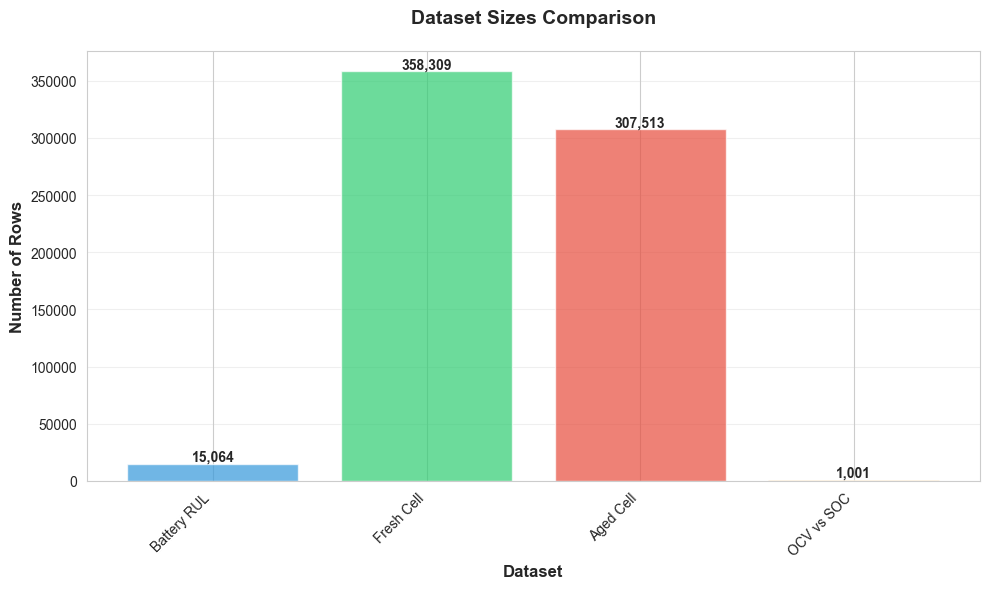

✓ Data preparation and initial EDA completed!


In [50]:
# Quick visualization of dataset sizes
fig, ax = plt.subplots(figsize=(10, 6))
datasets = ['Battery RUL', 'Fresh Cell', 'Aged Cell', 'OCV vs SOC']
row_counts = [len(rul_df), len(fresh_cell_df), len(aged_cell_df), len(ocv_soc_df)]

bars = ax.bar(datasets, row_counts, color=['#3498db', '#2ecc71', '#e74c3c', '#f39c12'], alpha=0.7)
ax.set_ylabel('Number of Rows', fontsize=12, fontweight='bold')
ax.set_xlabel('Dataset', fontsize=12, fontweight='bold')
ax.set_title('Dataset Sizes Comparison', fontsize=14, fontweight='bold', pad=20)
ax.grid(axis='y', alpha=0.3)

# Add value labels on bars
for bar, count in zip(bars, row_counts):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'{count:,}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("✓ Data preparation and initial EDA completed!")
